## Toxic: LDA

Toxic words should be classified into one of six groups: Toxic, Severe Toxic, Obscene, Threat, Insult and Identity Hate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim import corpora, models, similarities, matutils
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
df.head()

(159571, 19)


id  \
idx                                  
3a4c7758fad18de3  3a4c7758fad18de3   
24d2b50726b67167  24d2b50726b67167   
c586b7a2fd575b13  c586b7a2fd575b13   
77d84b1321c22d9a  77d84b1321c22d9a   
1368c10281978876  1368c10281978876   

                                                       comment_text  toxic  \
idx                                                                          
3a4c7758fad18de3  , I hope your retarded kids get anal raped and...      1   
24d2b50726b67167  I am going to murder ZimZalaBim ST47 for being...      1   
c586b7a2fd575b13  Shut up you asswipe, we don't care. I'll decap...      1   
77d84b1321c22d9a  LGBT \n\nyou little fuck , are you a fag , tha...      1   
1368c10281978876  You're a stupid cunt \n\nFuck you dumb arse, y...      1   

                  severe_toxic  obscene  threat  insult  identity_hate  \
idx                                                                      
3a4c7758fad18de3             1        1       1       1              1   
24d2b50726b67167             1        1       1       1              1   
c586b7a2fd575b13             1        1       1       1              1   
77d84b1321c22d9a             1        1       1       1              1   
1368c10281978876             1        1       1       1              1   

                 category  rating  \
idx                                 
3a4c7758fad18de3      NaN       6   
24d2b50726b67167      NaN       6   
c586b7a2fd575b13      NaN       6   
77d84b1321c22d9a      NaN       6   
1368c10281978876      NaN       6   

                                                     comment_text_s  \
idx                                                                   
3a4c7758fad18de3  , I hope your retarded kids get anal raped and...   
24d2b50726b67167  I am going to murder ZimZalaBim ST47 for being...   
c586b7a2fd575b13  Shut up you asswipe, we don't care. I'll decap...   
77d84b1321c22d9a  LGBT \n\nyou little fuck , are you a fag , tha...   
1368c10281978876  You're a stupid cunt \n\nFuck you dumb arse, y...   

                                                     comment_text_f  \
idx                                                                   
3a4c7758fad18de3  , hope retarded kids get anal raped murdered h...   
24d2b50726b67167  am going to murder ZimZalaBim ST47 being evil ...   
c586b7a2fd575b13  Shut up asswipe , do n't care . 'll decapitate...   
77d84b1321c22d9a  LGBT little fuck , are fag , piece shit page i...   
1368c10281978876  're stupid cunt Fuck dumb arse , mum has hairy...   

                                                        token_clean  \
idx                                                                   
3a4c7758fad18de3  [i, hope, your, retarded, kids, get, anal, rap...   
24d2b50726b67167  [i, am, going, to, murder, zimzalabim, st47, f...   
c586b7a2fd575b13  [shut, up, you, asswipe, we, dont, care, ill, ...   
77d84b1321c22d9a  [lgbt, you, little, fuck, are, you, a, fag, th...   
1368c10281978876  [youre, a, stupid, cunt, fuck, you, dumb, arse...   

                                                         sent_token  \
idx                                                                   
3a4c7758fad18de3  [, I hope your retarded kids get anal raped an...   
24d2b50726b67167  [I am going to murder ZimZalaBim ST47 for bein...   
c586b7a2fd575b13  [Shut up you asswipe, we don't care., I'll dec...   
77d84b1321c22d9a  [LGBT \n\nyou little fuck , are you a fag , th...   
1368c10281978876  [You're a stupid cunt \n\nFuck you dumb arse, ...   

                  polarity_comment  polarity_comment_s  word_count  \
idx                                                                  
3a4c7758fad18de3              0.00                0.00          94   
24d2b50726b67167              0.00                0.00          12   
c586b7a2fd575b13             -0.25               -0.25          24   
77d84b1321c22d9a              0.00                0.00          56   
1368c10281978876           

In [3]:
df_t = df[df['rating']>0]
df_nt = df[df['rating']==0]
print(df_t.shape, df_nt.shape)

(16225, 19) (143346, 19)


## Toxic Only

In [4]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(df_t.comment_text_s)
counts = count_vectorizer.transform(df_t.comment_text_s).transpose()
print(counts.shape)
corpus = matutils.Sparse2Corpus(counts)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
print(len(id2word))

(233412, 16225)
233412


In [5]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=6, id2word=id2word, passes=10) # minimum_probability=0.03, 

2018-03-01 14:49:07,517 : INFO : using symmetric alpha at 0.16666666666666666
2018-03-01 14:49:07,520 : INFO : using symmetric eta at 0.16666666666666666
2018-03-01 14:49:07,624 : INFO : using serial LDA version on this node
2018-03-01 14:49:08,159 : INFO : running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 16225 documents, updating model once every 2000 documents, evaluating perplexity every 16225 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 14:49:08,210 : INFO : PROGRESS: pass 0, at document #2000/16225
2018-03-01 14:49:13,583 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:49:13,858 : INFO : topic #3 (0.167): 0.003*"die" + 0.002*"sucks" + 0.002*"fuckin" + 0.002*"nigger" + 0.002*"suck suck" + 0.002*"hate" + 0.001*"kill" + 0.001*"suck suck suck" + 0.001*"fat" + 0.001*"mother"
2018-03-01 14:49:13,867 : INFO : topic #1 (0.167): 0.008*"fuck fuck" + 0.006*"nigger" + 0.005*"fuc

2018-03-01 14:49:37,359 : INFO : topic diff=0.613322, rho=0.408248
2018-03-01 14:49:37,443 : INFO : PROGRESS: pass 0, at document #14000/16225
2018-03-01 14:49:42,467 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:49:42,838 : INFO : topic #4 (0.167): 0.003*"moron" + 0.002*"hi" + 0.002*"doing" + 0.002*"man" + 0.001*"dude" + 0.001*"hi moron" + 0.001*"moron hi" + 0.001*"hi moron hi" + 0.001*"doesn" + 0.001*"moron hi moron"
2018-03-01 14:49:42,848 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"ha" + 0.001*"old" + 0.001*"care" + 0.001*"rape" + 0.001*"admin" + 0.001*"come" + 0.001*"power" + 0.001*"yeah" + 0.001*"oh"
2018-03-01 14:49:42,896 : INFO : topic #3 (0.167): 0.001*"sucks" + 0.001*"let" + 0.001*"link" + 0.001*"delete" + 0.001*"pages" + 0.001*"penis" + 0.001*"hate" + 0.001*"attacks" + 0.001*"articles" + 0.001*"personal"
2018-03-01 14:49:42,912 : INFO : topic #2 (0.167): 0.001*"utc" + 0.001*"good" + 0.001*"ve" + 0.001*"lies" + 0.001*"bullshi

2018-03-01 14:49:57,653 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:49:57,945 : INFO : topic #1 (0.167): 0.003*"fuck fuck" + 0.003*"nigger" + 0.002*"fuck fuck fuck" + 0.002*"nigger nigger" + 0.002*"wiki" + 0.002*"nigger nigger nigger" + 0.001*"talk page" + 0.001*"read" + 0.001*"http" + 0.001*"vandalism"
2018-03-01 14:49:57,950 : INFO : topic #4 (0.167): 0.003*"moron" + 0.002*"hi" + 0.001*"doing" + 0.001*"im" + 0.001*"man" + 0.001*"picture" + 0.001*"dickhead" + 0.001*"dude" + 0.001*"edits" + 0.001*"fag"
2018-03-01 14:49:57,961 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"fag" + 0.001*"ha" + 0.001*"big" + 0.001*"old" + 0.001*"piece" + 0.001*"oh" + 0.001*"sick" + 0.001*"care" + 0.001*"piece shit"
2018-03-01 14:49:57,968 : INFO : topic #5 (0.167): 0.002*"shut" + 0.002*"ip" + 0.002*"damn" + 0.001*"real" + 0.001*"attack" + 0.001*"piece" + 0.001*"personal" + 0.001*"bastard" + 0.001*"person" + 0.001*"cock"
2018-03-01 14:49:57,975 : INFO : topi

2018-03-01 14:50:10,173 : INFO : topic #2 (0.167): 0.001*"utc" + 0.001*"thanks" + 0.001*"lies" + 0.001*"ve" + 0.001*"good" + 0.001*"sorry" + 0.001*"didn" + 0.001*"nazi" + 0.001*"fact" + 0.001*"fat"
2018-03-01 14:50:10,184 : INFO : topic #0 (0.167): 0.002*"hate" + 0.001*"piece" + 0.001*"fag" + 0.001*"ha" + 0.001*"sick" + 0.001*"piece shit" + 0.001*"yeah" + 0.001*"big" + 0.001*"old" + 0.001*"mean"
2018-03-01 14:50:10,192 : INFO : topic #3 (0.167): 0.003*"retarded" + 0.002*"sucks" + 0.001*"retarded retarded" + 0.001*"retarded retarded retarded" + 0.001*"delete" + 0.001*"die" + 0.001*"pages" + 0.001*"hate" + 0.001*"kill" + 0.001*"articles"
2018-03-01 14:50:10,199 : INFO : topic #1 (0.167): 0.004*"fuck fuck" + 0.004*"nigger" + 0.002*"fuck fuck fuck" + 0.002*"nigger nigger" + 0.002*"talk page" + 0.002*"nigger nigger nigger" + 0.001*"wiki" + 0.001*"comment" + 0.001*"bias" + 0.001*"http"
2018-03-01 14:50:10,215 : INFO : topic diff=0.256722, rho=0.299981
2018-03-01 14:50:10,263 : INFO : PROGRES

2018-03-01 14:50:20,051 : INFO : topic #2 (0.167): 0.001*"utc" + 0.001*"good" + 0.001*"lies" + 0.001*"bullshit" + 0.001*"ve" + 0.001*"care" + 0.001*"editing" + 0.001*"understand" + 0.001*"sockpuppet" + 0.001*"man"
2018-03-01 14:50:20,055 : INFO : topic #4 (0.167): 0.002*"moron" + 0.002*"hi" + 0.001*"doing" + 0.001*"man" + 0.001*"dude" + 0.001*"im" + 0.001*"hi moron" + 0.001*"moron hi" + 0.001*"hi moron hi" + 0.001*"sock"
2018-03-01 14:50:20,062 : INFO : topic diff=0.254967, rho=0.299981
2018-03-01 14:50:20,124 : INFO : PROGRESS: pass 2, at document #16000/16225
2018-03-01 14:50:21,170 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:50:21,413 : INFO : topic #1 (0.167): 0.001*"wiki" + 0.001*"talk page" + 0.001*"http" + 0.001*"vandalism" + 0.001*"wanker" + 0.001*"fuck fuck" + 0.001*"com" + 0.001*"comments" + 0.001*"let" + 0.001*"nigger"
2018-03-01 14:50:21,423 : INFO : topic #5 (0.167): 0.002*"ip" + 0.001*"attack" + 0.001*"nonsense" + 0.001*"crap

2018-03-01 14:50:27,341 : INFO : topic #3 (0.167): 0.002*"sucks" + 0.001*"retarded" + 0.001*"delete" + 0.001*"penis" + 0.001*"die" + 0.001*"pages" + 0.001*"personal" + 0.001*"suck suck" + 0.001*"idiots" + 0.001*"hate"
2018-03-01 14:50:27,353 : INFO : topic diff=0.204335, rho=0.287331
2018-03-01 14:50:27,386 : INFO : PROGRESS: pass 3, at document #10000/16225
2018-03-01 14:50:28,317 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:50:28,570 : INFO : topic #3 (0.167): 0.002*"sucks" + 0.002*"retarded" + 0.001*"penis" + 0.001*"delete" + 0.001*"die" + 0.001*"pages" + 0.001*"personal" + 0.001*"idiots" + 0.001*"attacks" + 0.001*"link"
2018-03-01 14:50:28,581 : INFO : topic #1 (0.167): 0.003*"fuck fuck" + 0.002*"nigger" + 0.002*"fuck fuck fuck" + 0.002*"wiki" + 0.001*"nigger nigger" + 0.001*"wanker" + 0.001*"talk page" + 0.001*"nigger nigger nigger" + 0.001*"http" + 0.001*"poop"
2018-03-01 14:50:28,589 : INFO : topic #2 (0.167): 0.002*"bullshit" + 0.00

2018-03-01 14:50:34,776 : INFO : topic diff=0.166833, rho=0.276158
2018-03-01 14:50:34,823 : INFO : PROGRESS: pass 4, at document #4000/16225
2018-03-01 14:50:35,761 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:50:36,032 : INFO : topic #1 (0.167): 0.004*"fuck fuck" + 0.003*"nigger" + 0.002*"fuck fuck fuck" + 0.002*"nigger nigger" + 0.002*"nigger nigger nigger" + 0.002*"talk page" + 0.001*"wiki" + 0.001*"comment" + 0.001*"http" + 0.001*"read"
2018-03-01 14:50:36,041 : INFO : topic #5 (0.167): 0.002*"shut" + 0.001*"attack" + 0.001*"ip" + 0.001*"twat" + 0.001*"real" + 0.001*"damn" + 0.001*"fucker" + 0.001*"piece" + 0.001*"bastard" + 0.001*"ve"
2018-03-01 14:50:36,049 : INFO : topic #0 (0.167): 0.002*"hate" + 0.001*"ha" + 0.001*"piece" + 0.001*"big" + 0.001*"fag" + 0.001*"oh" + 0.001*"sick" + 0.001*"care" + 0.001*"piece shit" + 0.001*"yeah"
2018-03-01 14:50:36,058 : INFO : topic #2 (0.167): 0.001*"fat" + 0.001*"jew" + 0.001*"utc" + 0.001*"didn"

2018-03-01 14:50:44,346 : INFO : topic #2 (0.167): 0.001*"utc" + 0.001*"lies" + 0.001*"good" + 0.001*"ve" + 0.001*"understand" + 0.001*"comment" + 0.001*"care" + 0.001*"bullshit" + 0.001*"gay gay" + 0.001*"silly"
2018-03-01 14:50:44,353 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"ha" + 0.001*"yeah" + 0.001*"fag" + 0.001*"ha ha" + 0.001*"old" + 0.001*"care" + 0.001*"come" + 0.001*"oh" + 0.001*"admin"
2018-03-01 14:50:44,359 : INFO : topic #5 (0.167): 0.002*"ip" + 0.001*"attack" + 0.001*"nonsense" + 0.001*"crap" + 0.001*"personal" + 0.001*"vandalism" + 0.001*"real" + 0.001*"sex" + 0.001*"damn" + 0.001*"tell"
2018-03-01 14:50:44,368 : INFO : topic #1 (0.167): 0.001*"wiki" + 0.001*"talk page" + 0.001*"http" + 0.001*"fuck fuck" + 0.001*"vandalism" + 0.001*"wanker" + 0.001*"nigger" + 0.001*"com" + 0.001*"wp" + 0.001*"comments"
2018-03-01 14:50:44,377 : INFO : topic diff=0.178887, rho=0.276158
2018-03-01 14:50:44,844 : INFO : -11.860 per-word bound, 3716.4 perplexity estimate based on a 

2018-03-01 14:50:51,332 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"ha" + 0.001*"fag" + 0.001*"old" + 0.001*"big" + 0.001*"admin" + 0.001*"care" + 0.001*"ha ha" + 0.001*"piece" + 0.001*"sick"
2018-03-01 14:50:51,338 : INFO : topic #3 (0.167): 0.002*"sucks" + 0.002*"retarded" + 0.001*"penis" + 0.001*"delete" + 0.001*"personal" + 0.001*"die" + 0.001*"pages" + 0.001*"attacks" + 0.001*"idiots" + 0.001*"link"
2018-03-01 14:50:51,343 : INFO : topic #2 (0.167): 0.002*"bullshit" + 0.001*"fat" + 0.001*"utc" + 0.001*"good" + 0.001*"editing" + 0.001*"man" + 0.001*"lol" + 0.001*"care" + 0.001*"thanks" + 0.001*"guy"
2018-03-01 14:50:51,352 : INFO : topic diff=0.160381, rho=0.266194
2018-03-01 14:50:51,412 : INFO : PROGRESS: pass 5, at document #12000/16225
2018-03-01 14:50:52,319 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:50:52,571 : INFO : topic #5 (0.167): 0.002*"ip" + 0.001*"twat" + 0.001*"attack" + 0.001*"shut" + 0.001*"damn" + 0.001*"persona

2018-03-01 14:50:59,781 : INFO : topic #4 (0.167): 0.002*"moron" + 0.001*"im" + 0.001*"fag" + 0.001*"doing" + 0.001*"man" + 0.001*"hi" + 0.001*"dickhead" + 0.001*"picture" + 0.001*"yo" + 0.001*"fuckin"
2018-03-01 14:50:59,788 : INFO : topic #5 (0.167): 0.002*"shut" + 0.001*"ip" + 0.001*"attack" + 0.001*"twat" + 0.001*"damn" + 0.001*"real" + 0.001*"piece" + 0.001*"fucker" + 0.001*"ve" + 0.001*"bastard"
2018-03-01 14:50:59,795 : INFO : topic diff=0.154146, rho=0.257236
2018-03-01 14:50:59,825 : INFO : PROGRESS: pass 6, at document #6000/16225
2018-03-01 14:51:00,701 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:51:00,952 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"fag" + 0.001*"ha" + 0.001*"piece" + 0.001*"big" + 0.001*"sick" + 0.001*"fag fag" + 0.001*"old" + 0.001*"care" + 0.001*"fag fag fag"
2018-03-01 14:51:00,959 : INFO : topic #4 (0.167): 0.002*"moron" + 0.001*"hi" + 0.001*"fag" + 0.001*"im" + 0.001*"dickhead" + 0.001*"man" + 0.001*"

2018-03-01 14:51:07,294 : INFO : topic diff=0.158763, rho=0.257236
2018-03-01 14:51:07,773 : INFO : -11.692 per-word bound, 3308.2 perplexity estimate based on a held-out corpus of 225 documents with 5398 words
2018-03-01 14:51:07,777 : INFO : PROGRESS: pass 6, at document #16225/16225
2018-03-01 14:51:07,901 : INFO : merging changes from 225 documents into a model of 16225 documents
2018-03-01 14:51:08,146 : INFO : topic #5 (0.167): 0.002*"attack" + 0.001*"ve" + 0.001*"ip" + 0.001*"shut" + 0.001*"real" + 0.001*"personal attack" + 0.001*"damn" + 0.001*"personal" + 0.001*"vandalism" + 0.001*"crap"
2018-03-01 14:51:08,153 : INFO : topic #1 (0.167): 0.002*"talk page" + 0.001*"comment" + 0.001*"bias" + 0.001*"wiki" + 0.001*"editor" + 0.001*"http" + 0.001*"read" + 0.001*"wp" + 0.001*"vandalism" + 0.001*"fuck fuck"
2018-03-01 14:51:08,159 : INFO : topic #3 (0.167): 0.003*"retarded" + 0.002*"retarded retarded" + 0.002*"retarded retarded retarded" + 0.001*"personal" + 0.001*"attacks" + 0.001*"

2018-03-01 14:51:15,234 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:51:15,495 : INFO : topic #4 (0.167): 0.002*"moron" + 0.002*"hi" + 0.001*"man" + 0.001*"im" + 0.001*"doing" + 0.001*"picture" + 0.001*"hi moron" + 0.001*"moron hi" + 0.001*"hi moron hi" + 0.001*"moron hi moron"
2018-03-01 14:51:15,502 : INFO : topic #3 (0.167): 0.001*"sucks" + 0.001*"retarded" + 0.001*"penis" + 0.001*"personal" + 0.001*"delete" + 0.001*"attacks" + 0.001*"link" + 0.001*"pages" + 0.001*"die" + 0.001*"deleted"
2018-03-01 14:51:15,508 : INFO : topic #5 (0.167): 0.002*"ip" + 0.001*"twat" + 0.001*"shut" + 0.001*"attack" + 0.001*"damn" + 0.001*"tell" + 0.001*"personal" + 0.001*"vandalism" + 0.001*"real" + 0.001*"crap"
2018-03-01 14:51:15,514 : INFO : topic #2 (0.167): 0.001*"utc" + 0.001*"bullshit" + 0.001*"good" + 0.001*"fat" + 0.001*"bum" + 0.001*"ve" + 0.001*"editing" + 0.001*"hitler" + 0.001*"care" + 0.001*"understand"
2018-03-01 14:51:15,522 : INFO : topic #1

2018-03-01 14:51:23,366 : INFO : topic #2 (0.167): 0.001*"fat" + 0.001*"utc" + 0.001*"jew" + 0.001*"didn" + 0.001*"good" + 0.001*"thanks" + 0.001*"ban" + 0.001*"lies" + 0.001*"ve" + 0.001*"bullshit"
2018-03-01 14:51:23,373 : INFO : topic #1 (0.167): 0.004*"fuck fuck" + 0.003*"nigger" + 0.003*"fuck fuck fuck" + 0.002*"nigger nigger" + 0.002*"nigger nigger nigger" + 0.001*"talk page" + 0.001*"wiki" + 0.001*"wanker" + 0.001*"http" + 0.001*"read"
2018-03-01 14:51:23,378 : INFO : topic #3 (0.167): 0.002*"retarded" + 0.001*"sucks" + 0.001*"suck suck" + 0.001*"delete" + 0.001*"die" + 0.001*"personal" + 0.001*"penis" + 0.001*"pages" + 0.001*"retarded retarded" + 0.001*"dumb"
2018-03-01 14:51:23,382 : INFO : topic #4 (0.167): 0.002*"moron" + 0.001*"hi" + 0.001*"im" + 0.001*"fag" + 0.001*"man" + 0.001*"dickhead" + 0.001*"doing" + 0.001*"picture" + 0.001*"oh" + 0.001*"fuckin"
2018-03-01 14:51:23,390 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"fag" + 0.001*"ha" + 0.001*"piece" + 0.001*"big" +

2018-03-01 14:51:31,761 : INFO : topic #5 (0.167): 0.002*"attack" + 0.001*"ve" + 0.001*"ip" + 0.001*"shut" + 0.001*"real" + 0.001*"personal attack" + 0.001*"damn" + 0.001*"personal" + 0.001*"vandalism" + 0.001*"crap"
2018-03-01 14:51:31,767 : INFO : topic #4 (0.167): 0.001*"moron" + 0.001*"im" + 0.001*"picture" + 0.001*"sock" + 0.001*"called" + 0.001*"hi" + 0.001*"man" + 0.001*"doing" + 0.001*"wasn" + 0.001*"better"
2018-03-01 14:51:31,774 : INFO : topic #0 (0.167): 0.002*"hate" + 0.001*"ha" + 0.001*"sick" + 0.001*"care" + 0.001*"fag" + 0.001*"feel" + 0.001*"got" + 0.001*"old" + 0.001*"agree" + 0.001*"question"
2018-03-01 14:51:31,782 : INFO : topic #3 (0.167): 0.003*"retarded" + 0.002*"retarded retarded" + 0.002*"retarded retarded retarded" + 0.001*"personal" + 0.001*"attacks" + 0.001*"link" + 0.001*"delete" + 0.001*"retardedyour" + 0.001*"sucks" + 0.001*"claims"
2018-03-01 14:51:31,789 : INFO : topic diff=0.084615, rho=0.241737
2018-03-01 14:51:31,848 : INFO : PROGRESS: pass 9, at do

2018-03-01 14:51:42,222 : INFO : topic #4 (0.167): 0.002*"moron" + 0.002*"hi" + 0.001*"man" + 0.001*"im" + 0.001*"doing" + 0.001*"picture" + 0.001*"hi moron" + 0.001*"moron hi" + 0.001*"hi moron hi" + 0.001*"moron hi moron"
2018-03-01 14:51:42,232 : INFO : topic #3 (0.167): 0.001*"sucks" + 0.001*"retarded" + 0.001*"penis" + 0.001*"personal" + 0.001*"delete" + 0.001*"attacks" + 0.001*"link" + 0.001*"pages" + 0.001*"die" + 0.001*"deleted"
2018-03-01 14:51:42,246 : INFO : topic #0 (0.167): 0.002*"hate" + 0.002*"ha" + 0.001*"old" + 0.001*"ha ha" + 0.001*"fag" + 0.001*"big" + 0.001*"admin" + 0.001*"care" + 0.001*"hate hate" + 0.001*"oh"
2018-03-01 14:51:42,265 : INFO : topic diff=0.147567, rho=0.234969
2018-03-01 14:51:42,354 : INFO : PROGRESS: pass 9, at document #14000/16225
2018-03-01 14:51:43,698 : INFO : merging changes from 2000 documents into a model of 16225 documents
2018-03-01 14:51:44,084 : INFO : topic #3 (0.167): 0.001*"sucks" + 0.001*"retarded" + 0.001*"delete" + 0.001*"person

In [6]:
topics = lda.print_topics(num_words=200)
topics

2018-03-01 14:51:46,592 : INFO : topic #0 (0.167): 0.002*"hate" + 0.001*"ha" + 0.001*"sick" + 0.001*"fag" + 0.001*"care" + 0.001*"feel" + 0.001*"old" + 0.001*"got" + 0.001*"agree" + 0.001*"question" + 0.001*"yeah" + 0.001*"oh" + 0.001*"says" + 0.001*"doesn" + 0.001*"warning" + 0.001*"wow" + 0.001*"allowed" + 0.001*"ha ha" + 0.001*"big" + 0.001*"come" + 0.001*"comments" + 0.001*"man" + 0.001*"evil" + 0.001*"help" + 0.001*"prove" + 0.001*"admin" + 0.001*"obvious" + 0.001*"means" + 0.001*"text" + 0.001*"mean" + 0.001*"delete" + 0.001*"telling" + 0.001*"trying" + 0.001*"mentally" + 0.001*"way" + 0.001*"talk page" + 0.001*"ve" + 0.001*"deleted" + 0.001*"need" + 0.001*"wrong" + 0.001*"hate hate" + 0.001*"troll" + 0.001*"instead" + 0.001*"wtf" + 0.001*"used" + 0.001*"threats" + 0.001*"ago" + 0.001*"dont care" + 0.001*"account" + 0.001*"bold" + 0.001*"believe" + 0.001*"year" + 0.001*"simply" + 0.001*"wiki" + 0.001*"ill" + 0.000*"power" + 0.000*"site" + 0.000*"accusations" + 0.000*"future" + 0.

2018-03-01 14:51:46,617 : INFO : topic #3 (0.167): 0.003*"retarded" + 0.002*"retarded retarded" + 0.002*"retarded retarded retarded" + 0.001*"personal" + 0.001*"attacks" + 0.001*"delete" + 0.001*"link" + 0.001*"sucks" + 0.001*"retardedyour" + 0.001*"pages" + 0.001*"claims" + 0.001*"ridiculous" + 0.001*"personal attacks" + 0.001*"hate" + 0.001*"friend" + 0.001*"deleted" + 0.001*"articles" + 0.001*"discussion" + 0.001*"admin" + 0.001*"idiots" + 0.001*"ignorant" + 0.001*"person" + 0.001*"joke" + 0.001*"let" + 0.001*"reply" + 0.001*"liar" + 0.001*"false" + 0.001*"metal" + 0.001*"site" + 0.001*"write" + 0.001*"unblock" + 0.001*"look" + 0.001*"sources" + 0.001*"new" + 0.001*"talk page" + 0.001*"reason" + 0.001*"penis" + 0.001*"shove" + 0.001*"kill" + 0.001*"better" + 0.001*"censor" + 0.001*"feel" + 0.001*"editing" + 0.001*"things" + 0.001*"taken" + 0.001*"way" + 0.001*"talk pages" + 0.001*"retardedyour retardedyour retarded" + 0.001*"retarded retardedyour retardedyour" + 0.001*"retarded reta

[(0,
  '0.002*"hate" + 0.001*"ha" + 0.001*"sick" + 0.001*"fag" + 0.001*"care" + 0.001*"feel" + 0.001*"old" + 0.001*"got" + 0.001*"agree" + 0.001*"question" + 0.001*"yeah" + 0.001*"oh" + 0.001*"says" + 0.001*"doesn" + 0.001*"warning" + 0.001*"wow" + 0.001*"allowed" + 0.001*"ha ha" + 0.001*"big" + 0.001*"come" + 0.001*"comments" + 0.001*"man" + 0.001*"evil" + 0.001*"help" + 0.001*"prove" + 0.001*"admin" + 0.001*"obvious" + 0.001*"means" + 0.001*"text" + 0.001*"mean" + 0.001*"delete" + 0.001*"telling" + 0.001*"trying" + 0.001*"mentally" + 0.001*"way" + 0.001*"talk page" + 0.001*"ve" + 0.001*"deleted" + 0.001*"need" + 0.001*"wrong" + 0.001*"hate hate" + 0.001*"troll" + 0.001*"instead" + 0.001*"wtf" + 0.001*"used" + 0.001*"threats" + 0.001*"ago" + 0.001*"dont care" + 0.001*"account" + 0.001*"bold" + 0.001*"believe" + 0.001*"year" + 0.001*"simply" + 0.001*"wiki" + 0.001*"ill" + 0.000*"power" + 0.000*"site" + 0.000*"accusations" + 0.000*"future" + 0.000*"don just" + 0.000*"rape" + 0.000*"die"

In [7]:
type(topics)

list

In [8]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [9]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [10]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[0:15]

[[(0, 0.058640383), (2, 0.046264283), (3, 0.099183284), (4, 0.78791684)],
 [(0, 0.84324443),
  (1, 0.011154405),
  (2, 0.011261136),
  (3, 0.11202282),
  (4, 0.011177098),
  (5, 0.011140084)],
 [(0, 0.088017225), (1, 0.86342001), (3, 0.035305787)],
 [(0, 0.86309963), (3, 0.079114676), (4, 0.041056547)],
 [(0, 0.041289326), (2, 0.85567808), (3, 0.088673733)],
 [(2, 0.97016019)],
 [(0, 0.030436812),
  (2, 0.047726337),
  (3, 0.030395472),
  (4, 0.85656232),
  (5, 0.031089244)],
 [(0, 0.89796048), (2, 0.029882519), (3, 0.060168482)],
 [(1, 0.95589942)],
 [(0, 0.88474727),
  (1, 0.010423551),
  (2, 0.010465201),
  (3, 0.010562194),
  (4, 0.073272966),
  (5, 0.010528811)],
 [(1, 0.1073221), (2, 0.79190797), (4, 0.091293506)],
 [(0, 0.16083084), (5, 0.8188985)],
 [(0, 0.062782757), (2, 0.061521992), (4, 0.80477506), (5, 0.06396319)],
 [(0, 0.043316551), (3, 0.14217845), (4, 0.80008596)],
 [(1, 0.79452014), (3, 0.18236978)]]

In [11]:
df.comment_text[5]

"and your little faggot boy Propol, pray, pray little wonk that I don't find your little ass and kill you"

In [12]:
lda.log_perplexity

<bound method LdaModel.log_perplexity of <gensim.models.ldamodel.LdaModel object at 0x109a1bf60>>

(0, '0.002*"hate" + 0.001*"ha" + 0.001*"sick" + 0.001*"fag" + 0.001*"care" + 0.001*"feel" + 0.001*"old" + 0.001*"got" + 0.001*"agree" + 0.001*"question" + 0.001*"yeah" + 0.001*"oh" + 0.001*"says" + 0.001*"doesn" + 0.001*"warning" + 0.001*"wow" + 0.001*"allowed" + 0.001*"ha ha" + 0.001*"big" + 0.001*"come" + 0.001*"comments" + 0.001*"man" + 0.001*"evil" + 0.001*"help" + 0.001*"prove" + 0.001*"admin" + 0.001*"obvious" + 0.001*"means" + 0.001*"text" + 0.001*"mean" + 0.001*"delete" + 0.001*"telling" + 0.001*"trying" + 0.001*"mentally" + 0.001*"way" + 0.001*"talk page" + 0.001*"ve" + 0.001*"deleted" + 0.001*"need" + 0.001*"wrong" + 0.001*"hate hate" + 0.001*"troll" + 0.001*"instead" + 0.001*"wtf" + 0.001*"used" + 0.001*"threats" + 0.001*"ago" + 0.001*"dont care" + 0.001*"account" + 0.001*"bold" + 0.001*"believe" + 0.001*"year" + 0.001*"simply" + 0.001*"wiki" + 0.001*"ill" + 0.000*"power" + 0.000*"site" + 0.000*"accusations" + 0.000*"future" + 0.000*"don just" + 0.000*"rape" + 0.000*"die" + 

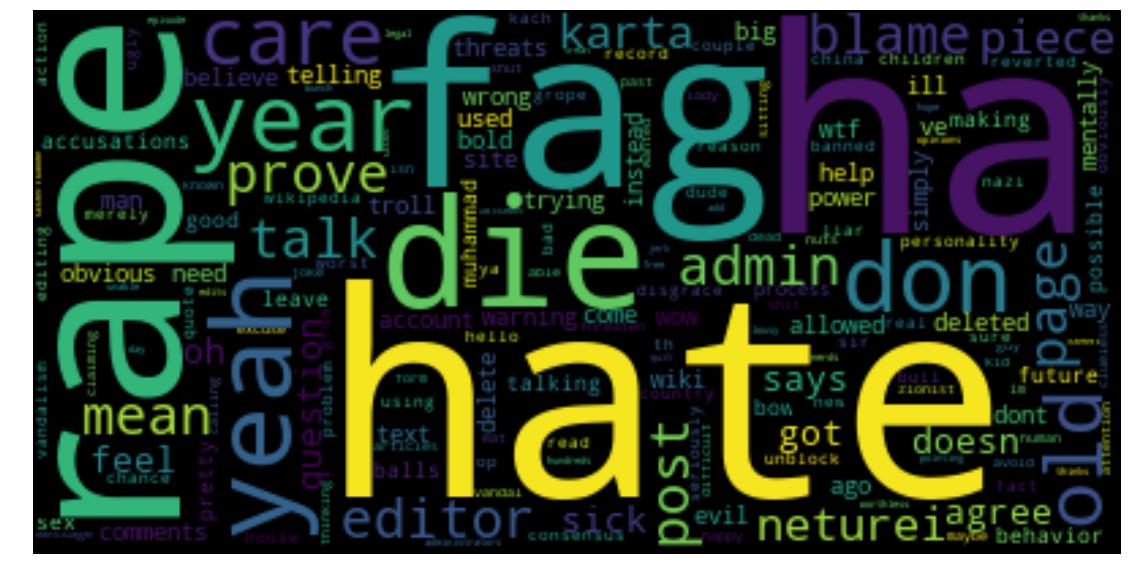

(1, '0.002*"talk page" + 0.001*"comment" + 0.001*"bias" + 0.001*"wiki" + 0.001*"editor" + 0.001*"http" + 0.001*"read" + 0.001*"fuck fuck" + 0.001*"vandalism" + 0.001*"wp" + 0.001*"note" + 0.001*"delete" + 0.001*"regarding" + 0.001*"nigger" + 0.001*"com" + 0.001*"wanker" + 0.001*"proof" + 0.001*"edits" + 0.001*"removed" + 0.001*"self" + 0.001*"sorry" + 0.001*"fellow" + 0.001*"poop" + 0.001*"stay" + 0.001*"fuck fuck fuck" + 0.001*"aids" + 0.001*"english" + 0.001*"language" + 0.001*"true" + 0.001*"mind" + 0.001*"lie" + 0.001*"project" + 0.001*"continue" + 0.001*"let" + 0.001*"www" + 0.001*"idiotic" + 0.001*"bad" + 0.001*"comments" + 0.001*"history" + 0.001*"doing" + 0.001*"harassing" + 0.001*"group" + 0.001*"crap" + 0.001*"based" + 0.001*"http www" + 0.001*"simple" + 0.001*"thing" + 0.001*"lying" + 0.001*"monkey" + 0.001*"saying" + 0.001*"look" + 0.001*"left" + 0.001*"pov" + 0.000*"simply" + 0.000*"ve" + 0.000*"butt" + 0.000*"clearly" + 0.000*"section" + 0.000*"wanker wanker" + 0.000*"beh

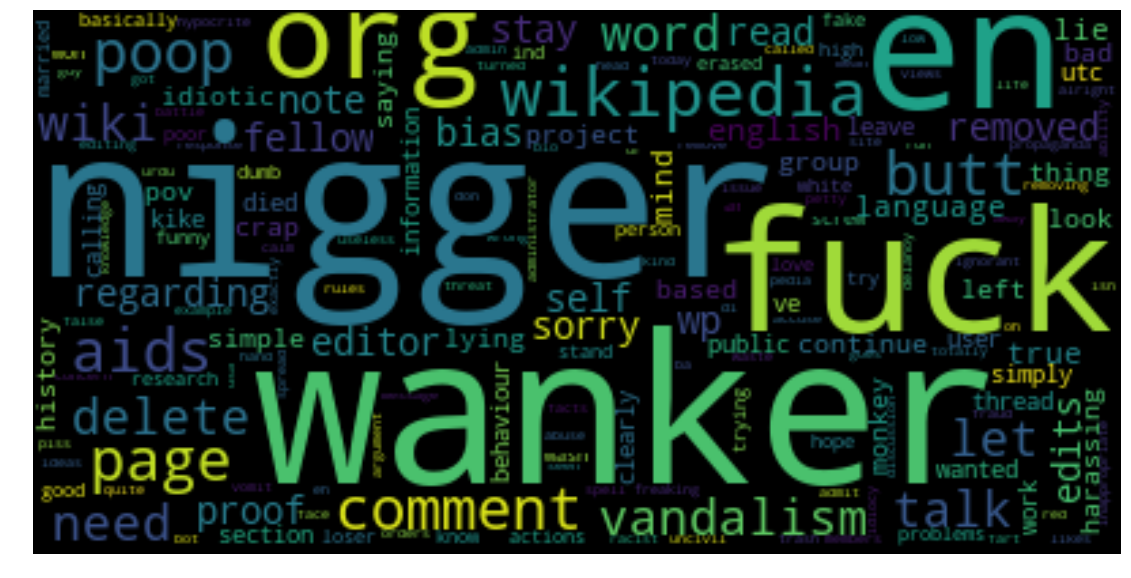

(2, '0.001*"utc" + 0.001*"lies" + 0.001*"thanks" + 0.001*"ve" + 0.001*"sockpuppet" + 0.001*"good" + 0.001*"bad" + 0.001*"didn" + 0.001*"sorry" + 0.001*"spam" + 0.001*"opinion" + 0.001*"bullshit" + 0.001*"lol" + 0.001*"anti" + 0.001*"game" + 0.001*"man" + 0.001*"pages" + 0.001*"biased" + 0.001*"oh" + 0.001*"actually" + 0.001*"hitler" + 0.001*"editing" + 0.001*"care" + 0.001*"fact" + 0.001*"left" + 0.001*"guy" + 0.001*"jews" + 0.001*"understand" + 0.001*"look" + 0.001*"comment" + 0.001*"articles" + 0.001*"seen" + 0.001*"fan" + 0.001*"day" + 0.001*"attacking" + 0.001*"work" + 0.001*"grow" + 0.001*"gay gay" + 0.001*"does" + 0.001*"silly" + 0.001*"hate" + 0.001*"definition" + 0.001*"heard" + 0.001*"dvd" + 0.001*"certainly" + 0.001*"deleting" + 0.001*"ban" + 0.001*"sources" + 0.001*"greek" + 0.001*"place" + 0.001*"weren" + 0.001*"feelings" + 0.001*"need" + 0.001*"state" + 0.001*"kind" + 0.000*"discuss" + 0.000*"using" + 0.000*"fascist" + 0.000*"attack" + 0.000*"nazi" + 0.000*"added" + 0.000*

(3, '0.003*"retarded" + 0.002*"retarded retarded" + 0.002*"retarded retarded retarded" + 0.001*"personal" + 0.001*"attacks" + 0.001*"delete" + 0.001*"link" + 0.001*"sucks" + 0.001*"retardedyour" + 0.001*"pages" + 0.001*"claims" + 0.001*"ridiculous" + 0.001*"personal attacks" + 0.001*"hate" + 0.001*"friend" + 0.001*"deleted" + 0.001*"articles" + 0.001*"discussion" + 0.001*"admin" + 0.001*"idiots" + 0.001*"ignorant" + 0.001*"person" + 0.001*"joke" + 0.001*"let" + 0.001*"reply" + 0.001*"liar" + 0.001*"false" + 0.001*"metal" + 0.001*"site" + 0.001*"write" + 0.001*"unblock" + 0.001*"look" + 0.001*"sources" + 0.001*"new" + 0.001*"talk page" + 0.001*"reason" + 0.001*"penis" + 0.001*"shove" + 0.001*"kill" + 0.001*"better" + 0.001*"censor" + 0.001*"feel" + 0.001*"editing" + 0.001*"things" + 0.001*"taken" + 0.001*"way" + 0.001*"talk pages" + 0.001*"retardedyour retardedyour retarded" + 0.001*"retarded retardedyour retardedyour" + 0.001*"retarded retardedyour" + 0.001*"retardedyour retarded" + 0.

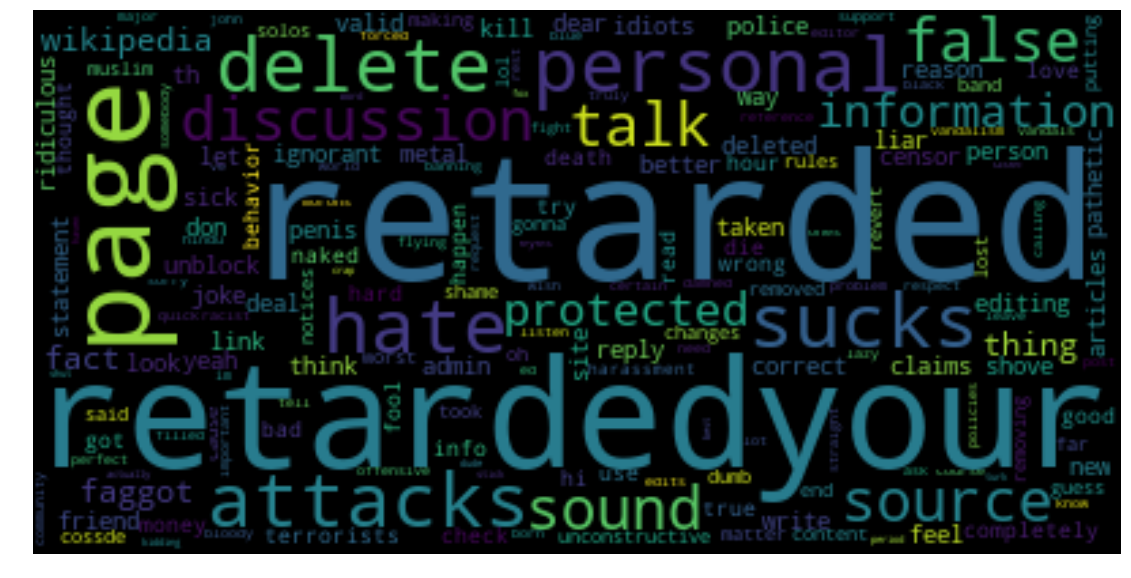

(4, '0.001*"moron" + 0.001*"im" + 0.001*"picture" + 0.001*"sock" + 0.001*"called" + 0.001*"hi" + 0.001*"man" + 0.001*"doing" + 0.001*"better" + 0.001*"wasn" + 0.001*"oh" + 0.001*"look" + 0.001*"clear" + 0.001*"explain" + 0.001*"yo" + 0.001*"fag" + 0.001*"ve" + 0.001*"reliable" + 0.001*"personal" + 0.001*"maybe" + 0.001*"edits" + 0.001*"clearly" + 0.001*"final" + 0.001*"dude" + 0.001*"need" + 0.001*"puppet" + 0.001*"saying" + 0.001*"hater" + 0.001*"troll" + 0.001*"american" + 0.001*"editing" + 0.001*"work" + 0.001*"use" + 0.001*"encyclopedia" + 0.001*"source" + 0.001*"let" + 0.001*"mean" + 0.001*"wrong" + 0.001*"sock puppet" + 0.001*"having" + 0.001*"seriously" + 0.001*"contributions" + 0.001*"hi moron" + 0.001*"users" + 0.001*"guys" + 0.001*"moron hi" + 0.001*"hi moron hi" + 0.001*"term" + 0.001*"vandalism" + 0.001*"didnt" + 0.001*"come" + 0.001*"delete" + 0.001*"moron hi moron" + 0.001*"balls" + 0.001*"questions" + 0.001*"deleting" + 0.000*"looks" + 0.000*"country" + 0.000*"mate" + 0.

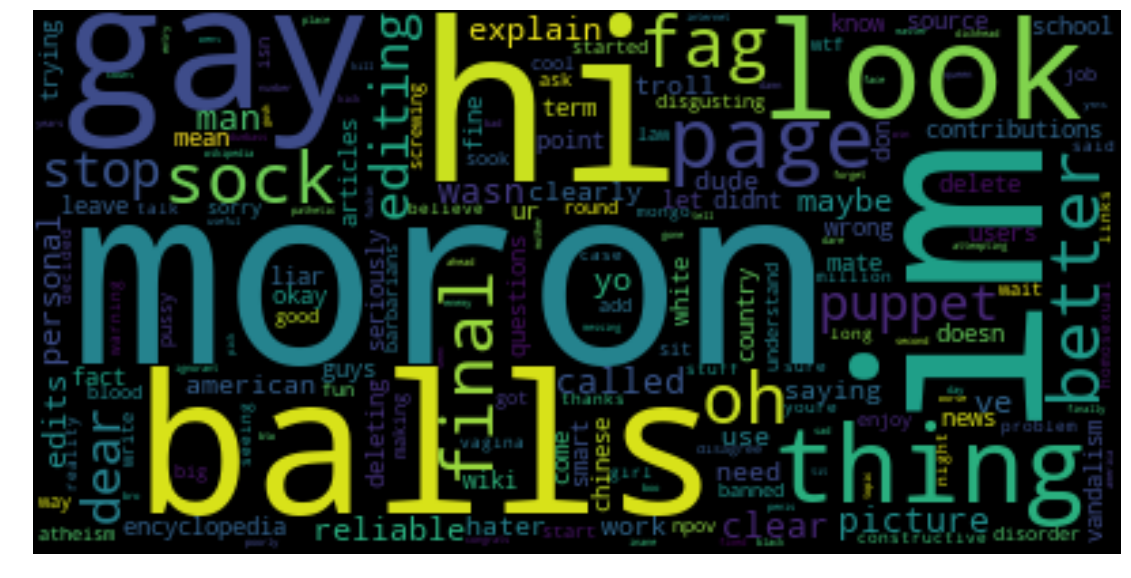

(5, '0.002*"attack" + 0.001*"ve" + 0.001*"ip" + 0.001*"shut" + 0.001*"real" + 0.001*"personal attack" + 0.001*"damn" + 0.001*"personal" + 0.001*"vandalism" + 0.001*"crap" + 0.001*"edits" + 0.001*"ok" + 0.001*"twat" + 0.001*"tell" + 0.001*"sex" + 0.001*"nonsense" + 0.001*"lol" + 0.001*"said" + 0.001*"does" + 0.001*"come" + 0.001*"smell" + 0.001*"address" + 0.001*"following" + 0.001*"blah" + 0.001*"god" + 0.001*"way" + 0.001*"google" + 0.001*"taking" + 0.001*"piece" + 0.001*"wrong" + 0.001*"person" + 0.001*"posted" + 0.001*"getting" + 0.001*"pig" + 0.001*"thought" + 0.001*"blocking" + 0.001*"let" + 0.001*"editing" + 0.001*"got" + 0.001*"remove" + 0.001*"annoying" + 0.001*"account" + 0.001*"civil" + 0.001*"claim" + 0.001*"dead" + 0.001*"pro" + 0.001*"jimbo" + 0.001*"actually" + 0.001*"defend" + 0.001*"don know" + 0.001*"says" + 0.001*"ip address" + 0.001*"job" + 0.001*"posting" + 0.001*"information" + 0.001*"long" + 0.000*"try" + 0.000*"need" + 0.000*"hello" + 0.000*"didn" + 0.000*"half" 

In [14]:
for topic in topics:
    print(topic)
    wordcloud = WordCloud(max_words=200).generate(topic[1])
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('../charts/wordcloud_topic' + str(topic[0]) + '.png')
    plt.show()

2018-03-01 14:54:09,271 : INFO : using symmetric alpha at 1.0
2018-03-01 14:54:09,281 : INFO : using symmetric eta at 1.0
2018-03-01 14:54:09,735 : INFO : using serial LDA version on this node
2018-03-01 14:54:09,984 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 143346 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 14:54:10,009 : INFO : PROGRESS: pass 0, at document #2000/143346
2018-03-01 14:54:10,247 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:54:10,450 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"comment" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"way" + 0.001*"look" + 0.001*"add" + 0.001*"information" + 0.000*"ll" + 0.000*"sources"
2018-03-01 14:54:10,458 : INFO : topic diff=1.092361, rho=1.000000
2018-03-01 14:54:10,486 : INFO : PROGRESS: pass 0, at document 

2018-03-01 14:54:29,913 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"way" + 0.001*"deletion" + 0.001*"list" + 0.001*"sources" + 0.001*"read" + 0.001*"ll"
2018-03-01 14:54:29,923 : INFO : topic diff=0.100805, rho=0.242536
2018-03-01 14:54:29,956 : INFO : PROGRESS: pass 0, at document #36000/143346
2018-03-01 14:54:30,262 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:54:30,579 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"discussion" + 0.001*"way" + 0.001*"welcome" + 0.001*"vandalism" + 0.001*"sorry" + 0.001*"ll" + 0.001*"read" + 0.000*"sources"
2018-03-01 14:54:30,590 : INFO : topic diff=0.100866, rho=0.235702
2018-03-01 14:54:30,633 : INFO : PROGRESS: pass 0, at document #38000/143346
2018-03-01 14:54:30,971 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:54:31,236 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"disc

2018-03-01 14:54:46,677 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"information" + 0.001*"read" + 0.000*"way" + 0.000*"point" + 0.000*"add"
2018-03-01 14:54:46,685 : INFO : topic diff=0.092471, rho=0.171499
2018-03-01 14:54:46,714 : INFO : PROGRESS: pass 0, at document #70000/143346
2018-03-01 14:54:47,018 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:54:47,564 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"information" + 0.001*"added" + 0.001*"read" + 0.000*"add" + 0.000*"look"
2018-03-01 14:54:47,575 : INFO : topic diff=0.091704, rho=0.169031
2018-03-01 14:54:47,613 : INFO : PROGRESS: pass 0, at document #72000/143346
2018-03-01 14:54:48,186 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:54:48,625 : INFO : topic #0 (1.000): 0.001*"image

2018-03-01 14:55:00,841 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"read" + 0.001*"added" + 0.001*"sorry" + 0.001*"sources" + 0.001*"information" + 0.001*"way" + 0.000*"discussion"
2018-03-01 14:55:00,854 : INFO : topic diff=0.086072, rho=0.140028
2018-03-01 14:55:00,887 : INFO : PROGRESS: pass 0, at document #104000/143346
2018-03-01 14:55:01,173 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:01,392 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"read" + 0.001*"added" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sorry" + 0.001*"sources" + 0.000*"way" + 0.000*"vandalism"
2018-03-01 14:55:01,400 : INFO : topic diff=0.089143, rho=0.138675
2018-03-01 14:55:01,426 : INFO : PROGRESS: pass 0, at document #106000/143346
2018-03-01 14:55:01,663 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:01,881 : INFO : topic #0 (1.000): 0.001*"im

2018-03-01 14:55:12,654 : INFO : topic diff=0.082399, rho=0.121268
2018-03-01 14:55:12,679 : INFO : PROGRESS: pass 0, at document #138000/143346
2018-03-01 14:55:12,901 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:13,130 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"sources" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"ll" + 0.001*"sorry" + 0.001*"add"
2018-03-01 14:55:13,138 : INFO : topic diff=0.083356, rho=0.120386
2018-03-01 14:55:14,224 : INFO : -14.210 per-word bound, 18953.3 perplexity estimate based on a held-out corpus of 2000 documents with 51567 words
2018-03-01 14:55:14,230 : INFO : PROGRESS: pass 0, at document #140000/143346
2018-03-01 14:55:14,465 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:14,659 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"added" + 0.001*"sources" + 0.001*"read" + 0.001*"di

2018-03-01 14:55:26,305 : INFO : topic diff=0.081746, rho=0.116505
2018-03-01 14:55:26,334 : INFO : PROGRESS: pass 1, at document #28000/143346
2018-03-01 14:55:26,579 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:26,846 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"ll" + 0.001*"added" + 0.001*"help" + 0.001*"read" + 0.001*"information"
2018-03-01 14:55:26,856 : INFO : topic diff=0.081360, rho=0.116505
2018-03-01 14:55:26,887 : INFO : PROGRESS: pass 1, at document #30000/143346
2018-03-01 14:55:27,133 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:27,378 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"added" + 0.001*"help" + 0.001*"ll" + 0.001*"read" + 0.001*"sorry"
2018-03-01 14:55:27,385 : INFO : topic diff=0.083554, rho=0.116505
201

2018-03-01 14:55:41,641 : INFO : PROGRESS: pass 1, at document #62000/143346
2018-03-01 14:55:42,207 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:42,499 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"read" + 0.001*"sources" + 0.001*"information" + 0.000*"ll" + 0.000*"way" + 0.000*"sorry"
2018-03-01 14:55:42,517 : INFO : topic diff=0.083940, rho=0.116505
2018-03-01 14:55:42,594 : INFO : PROGRESS: pass 1, at document #64000/143346
2018-03-01 14:55:42,919 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:43,183 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"read" + 0.001*"information" + 0.000*"way" + 0.000*"added" + 0.000*"vandalism"
2018-03-01 14:55:43,191 : INFO : topic diff=0.083277, rho=0.116505
2018-03-01 14:55:43,227 : INFO : PROGRESS: pass 1, at docum

2018-03-01 14:55:57,323 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:57,594 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"information" + 0.001*"discussion" + 0.001*"added" + 0.001*"read" + 0.001*"sorry" + 0.001*"way"
2018-03-01 14:55:57,601 : INFO : topic diff=0.086089, rho=0.116505
2018-03-01 14:55:57,630 : INFO : PROGRESS: pass 1, at document #98000/143346
2018-03-01 14:55:57,860 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:55:58,078 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"read" + 0.001*"discussion" + 0.001*"sources" + 0.001*"way" + 0.001*"information" + 0.001*"added" + 0.001*"sorry"
2018-03-01 14:55:58,088 : INFO : topic diff=0.083493, rho=0.116505
2018-03-01 14:55:59,232 : INFO : -14.123 per-word bound, 17838.7 perplexity estimate based on a held-out corpus of 2000 documents with 51

2018-03-01 14:56:09,217 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:09,569 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"deletion" + 0.001*"read" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"added" + 0.001*"way" + 0.000*"link" + 0.000*"add"
2018-03-01 14:56:09,576 : INFO : topic diff=0.083040, rho=0.116505
2018-03-01 14:56:09,603 : INFO : PROGRESS: pass 1, at document #132000/143346
2018-03-01 14:56:09,820 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:10,028 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"read" + 0.001*"deletion" + 0.001*"sources" + 0.001*"added" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"way" + 0.001*"ll" + 0.000*"information"
2018-03-01 14:56:10,042 : INFO : topic diff=0.084707, rho=0.116505
2018-03-01 14:56:10,088 : INFO : PROGRESS: pass 1, at document #134000/143346
2018-03-01 14:56:10,555 : INFO : merging changes from 2000 documents i

2018-03-01 14:56:21,666 : INFO : PROGRESS: pass 2, at document #20000/143346
2018-03-01 14:56:21,892 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:22,141 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"added" + 0.001*"read" + 0.001*"ll" + 0.001*"right"
2018-03-01 14:56:22,151 : INFO : topic diff=0.081107, rho=0.115723
2018-03-01 14:56:22,186 : INFO : PROGRESS: pass 2, at document #22000/143346
2018-03-01 14:56:22,468 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:22,862 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"list" + 0.001*"added" + 0.001*"ll" + 0.001*"right" + 0.001*"read"
2018-03-01 14:56:22,870 : INFO : topic diff=0.084544, rho=0.115723
2018-03-01 14:56:22,898 : INFO : PROGRESS: pass 2, at document #24000

2018-03-01 14:56:33,231 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"added" + 0.001*"read" + 0.001*"information" + 0.001*"ll" + 0.001*"way"
2018-03-01 14:56:33,239 : INFO : topic diff=0.083022, rho=0.115723
2018-03-01 14:56:33,263 : INFO : PROGRESS: pass 2, at document #56000/143346
2018-03-01 14:56:33,629 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:33,865 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"added" + 0.001*"information" + 0.001*"read" + 0.001*"ll" + 0.001*"add"
2018-03-01 14:56:33,872 : INFO : topic diff=0.083454, rho=0.115723
2018-03-01 14:56:33,901 : INFO : PROGRESS: pass 2, at document #58000/143346
2018-03-01 14:56:34,159 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:34,384 : INFO : topic #0 (1.000): 0.001*"image" +

2018-03-01 14:56:47,679 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.001*"added" + 0.000*"sorry" + 0.000*"ll"
2018-03-01 14:56:47,688 : INFO : topic diff=0.084002, rho=0.115723
2018-03-01 14:56:47,725 : INFO : PROGRESS: pass 2, at document #90000/143346
2018-03-01 14:56:48,147 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:48,579 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.001*"added" + 0.000*"sorry" + 0.000*"way"
2018-03-01 14:56:48,588 : INFO : topic diff=0.085371, rho=0.115723
2018-03-01 14:56:48,631 : INFO : PROGRESS: pass 2, at document #92000/143346
2018-03-01 14:56:48,944 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:56:49,292 : INFO : topic #0 (1.000): 0.001*"ima

2018-03-01 14:57:00,160 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:00,374 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"discussion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"read" + 0.000*"link" + 0.000*"way" + 0.000*"add"
2018-03-01 14:57:00,381 : INFO : topic diff=0.082135, rho=0.115723
2018-03-01 14:57:00,412 : INFO : PROGRESS: pass 2, at document #124000/143346
2018-03-01 14:57:00,680 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:00,918 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"sources" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"way" + 0.001*"link" + 0.001*"ll"
2018-03-01 14:57:00,927 : INFO : topic diff=0.081694, rho=0.115723
2018-03-01 14:57:00,957 : INFO : PROGRESS: pass 2, at document #126000/143346
2018-03-01 14:57:01,243 : INFO : merging changes from 2000 documents into a m

2018-03-01 14:57:14,594 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"read" + 0.001*"information" + 0.001*"discussion" + 0.001*"list" + 0.001*"added" + 0.001*"ll"
2018-03-01 14:57:14,601 : INFO : topic diff=0.082335, rho=0.114955
2018-03-01 14:57:14,636 : INFO : PROGRESS: pass 3, at document #14000/143346
2018-03-01 14:57:14,924 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:15,230 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"added" + 0.001*"information" + 0.001*"discussion" + 0.001*"read" + 0.001*"list" + 0.001*"ll"
2018-03-01 14:57:15,240 : INFO : topic diff=0.081130, rho=0.114955
2018-03-01 14:57:15,273 : INFO : PROGRESS: pass 3, at document #16000/143346
2018-03-01 14:57:15,591 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:15,833 : INFO : topic #0 (1.000): 0.001*"image"

2018-03-01 14:57:30,152 : INFO : topic diff=0.082755, rho=0.114955
2018-03-01 14:57:30,181 : INFO : PROGRESS: pass 3, at document #48000/143346
2018-03-01 14:57:30,412 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:30,631 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"read" + 0.001*"added" + 0.001*"information" + 0.001*"way" + 0.001*"ll"
2018-03-01 14:57:30,643 : INFO : topic diff=0.082714, rho=0.114955
2018-03-01 14:57:30,676 : INFO : PROGRESS: pass 3, at document #50000/143346
2018-03-01 14:57:30,908 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:31,143 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"added" + 0.001*"read" + 0.001*"way" + 0.001*"ll" + 0.001*"information"
2018-03-01 14:57:31,150 : INFO : topic diff=0.083742, rho=0.114955

2018-03-01 14:57:41,445 : INFO : topic diff=0.082253, rho=0.114955
2018-03-01 14:57:41,475 : INFO : PROGRESS: pass 3, at document #82000/143346
2018-03-01 14:57:41,709 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:41,921 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"ll" + 0.001*"information" + 0.001*"sorry" + 0.001*"read" + 0.001*"added"
2018-03-01 14:57:41,928 : INFO : topic diff=0.084114, rho=0.114955
2018-03-01 14:57:41,960 : INFO : PROGRESS: pass 3, at document #84000/143346
2018-03-01 14:57:42,202 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:42,400 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"information" + 0.001*"added" + 0.001*"ll" + 0.001*"read" + 0.000*"vandalism"
2018-03-01 14:57:42,407 : INFO : topic diff=0.083850, rho=

2018-03-01 14:57:53,261 : INFO : PROGRESS: pass 3, at document #116000/143346
2018-03-01 14:57:53,501 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:53,895 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"added" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"read" + 0.000*"information" + 0.000*"sorry" + 0.000*"way"
2018-03-01 14:57:53,908 : INFO : topic diff=0.083777, rho=0.114955
2018-03-01 14:57:53,942 : INFO : PROGRESS: pass 3, at document #118000/143346
2018-03-01 14:57:54,214 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:57:54,524 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"read" + 0.001*"sources" + 0.001*"welcome" + 0.001*"information" + 0.000*"link" + 0.000*"way"
2018-03-01 14:57:54,534 : INFO : topic diff=0.084069, rho=0.114955
2018-03-01 14:57:55,811 : INFO : -14.142 per-word bound, 18

2018-03-01 14:58:07,344 : INFO : topic diff=0.083720, rho=0.114203
2018-03-01 14:58:07,379 : INFO : PROGRESS: pass 4, at document #6000/143346
2018-03-01 14:58:07,895 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:08,275 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"discussion" + 0.001*"added" + 0.001*"read" + 0.001*"ll" + 0.001*"add" + 0.001*"information"
2018-03-01 14:58:08,284 : INFO : topic diff=0.082851, rho=0.114203
2018-03-01 14:58:08,328 : INFO : PROGRESS: pass 4, at document #8000/143346
2018-03-01 14:58:08,982 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:09,366 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"discussion" + 0.001*"added" + 0.001*"read" + 0.001*"information" + 0.001*"ll" + 0.000*"look"
2018-03-01 14:58:09,380 : INFO : topic diff=0.082669, rho=0.114203


2018-03-01 14:58:27,423 : INFO : PROGRESS: pass 4, at document #40000/143346
2018-03-01 14:58:27,730 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:27,967 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"added" + 0.001*"sources" + 0.001*"read" + 0.001*"sorry" + 0.001*"list" + 0.001*"ll"
2018-03-01 14:58:27,975 : INFO : topic diff=0.082460, rho=0.114203
2018-03-01 14:58:28,005 : INFO : PROGRESS: pass 4, at document #42000/143346
2018-03-01 14:58:28,422 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:28,675 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"added" + 0.001*"sources" + 0.001*"add" + 0.001*"read" + 0.001*"list" + 0.001*"ll"
2018-03-01 14:58:28,684 : INFO : topic diff=0.082678, rho=0.114203
2018-03-01 14:58:28,718 : INFO : PROGRESS: pass 4, at document #44000/143346
2

2018-03-01 14:58:40,271 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"read" + 0.001*"information" + 0.001*"added" + 0.001*"sorry" + 0.000*"way"
2018-03-01 14:58:40,280 : INFO : topic diff=0.082705, rho=0.114203
2018-03-01 14:58:40,310 : INFO : PROGRESS: pass 4, at document #76000/143346
2018-03-01 14:58:40,576 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:40,829 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"read" + 0.001*"added" + 0.001*"information" + 0.001*"sorry" + 0.000*"ll"
2018-03-01 14:58:40,839 : INFO : topic diff=0.083008, rho=0.114203
2018-03-01 14:58:40,876 : INFO : PROGRESS: pass 4, at document #78000/143346
2018-03-01 14:58:41,206 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:41,467 : INFO : topic #0 (1.000): 0.001*"ima

2018-03-01 14:58:55,115 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"sources" + 0.001*"sorry" + 0.001*"vandalism" + 0.000*"information"
2018-03-01 14:58:55,122 : INFO : topic diff=0.081641, rho=0.114203
2018-03-01 14:58:55,156 : INFO : PROGRESS: pass 4, at document #110000/143346
2018-03-01 14:58:55,462 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:55,771 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"added" + 0.001*"discussion" + 0.001*"sources" + 0.001*"deletion" + 0.001*"read" + 0.000*"sorry" + 0.000*"way" + 0.000*"vandalism"
2018-03-01 14:58:55,781 : INFO : topic diff=0.081622, rho=0.114203
2018-03-01 14:58:55,814 : INFO : PROGRESS: pass 4, at document #112000/143346
2018-03-01 14:58:56,120 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:58:56,392 : INFO : topic #0 (1.000): 0.0

2018-03-01 14:59:08,720 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"added" + 0.001*"sources" + 0.001*"read" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"ll" + 0.001*"sorry" + 0.000*"add"
2018-03-01 14:59:08,732 : INFO : topic diff=0.082112, rho=0.114203
2018-03-01 14:59:09,609 : INFO : -14.127 per-word bound, 17892.2 perplexity estimate based on a held-out corpus of 1346 documents with 34235 words
2018-03-01 14:59:09,610 : INFO : PROGRESS: pass 4, at document #143346/143346
2018-03-01 14:59:09,788 : INFO : merging changes from 1346 documents into a model of 143346 documents
2018-03-01 14:59:10,022 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"added" + 0.001*"welcome" + 0.001*"read" + 0.001*"ll" + 0.001*"add" + 0.000*"sorry"
2018-03-01 14:59:10,030 : INFO : topic diff=0.073040, rho=0.114203
2018-03-01 14:59:10,064 : INFO : PROGRESS: pass 5, at document #2000/143346
2018-03-01 14:59:10,334 : INFO : 

2018-03-01 14:59:20,173 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sources" + 0.001*"added" + 0.001*"ll" + 0.001*"read" + 0.001*"way" + 0.000*"help"
2018-03-01 14:59:20,182 : INFO : topic diff=0.083936, rho=0.113466
2018-03-01 14:59:20,214 : INFO : PROGRESS: pass 5, at document #34000/143346
2018-03-01 14:59:20,474 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:20,839 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"added" + 0.001*"deletion" + 0.001*"sources" + 0.001*"ll" + 0.001*"read" + 0.001*"way" + 0.001*"list"
2018-03-01 14:59:20,848 : INFO : topic diff=0.082142, rho=0.113466
2018-03-01 14:59:20,873 : INFO : PROGRESS: pass 5, at document #36000/143346
2018-03-01 14:59:21,098 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:21,467 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcom

2018-03-01 14:59:32,302 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.000*"way" + 0.000*"point" + 0.000*"add"
2018-03-01 14:59:32,310 : INFO : topic diff=0.082319, rho=0.113466
2018-03-01 14:59:32,343 : INFO : PROGRESS: pass 5, at document #68000/143346
2018-03-01 14:59:32,586 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:32,794 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"information" + 0.001*"read" + 0.000*"way" + 0.000*"add" + 0.000*"added"
2018-03-01 14:59:32,802 : INFO : topic diff=0.082072, rho=0.113466
2018-03-01 14:59:32,829 : INFO : PROGRESS: pass 5, at document #70000/143346
2018-03-01 14:59:33,120 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:33,450 : INFO : topic #0 (1.000): 0.001*"image"

2018-03-01 14:59:45,105 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"read" + 0.001*"added" + 0.001*"discussion" + 0.001*"sorry" + 0.001*"way" + 0.001*"information" + 0.001*"sources"
2018-03-01 14:59:45,115 : INFO : topic diff=0.083212, rho=0.113466
2018-03-01 14:59:45,150 : INFO : PROGRESS: pass 5, at document #102000/143346
2018-03-01 14:59:45,612 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:45,852 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"read" + 0.001*"added" + 0.001*"sources" + 0.001*"sorry" + 0.001*"information" + 0.001*"discussion" + 0.001*"way"
2018-03-01 14:59:45,865 : INFO : topic diff=0.081305, rho=0.113466
2018-03-01 14:59:45,900 : INFO : PROGRESS: pass 5, at document #104000/143346
2018-03-01 14:59:46,304 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:46,552 : INFO : topic #0 (1.000): 0.001*"

2018-03-01 14:59:56,732 : INFO : topic diff=0.083296, rho=0.113466
2018-03-01 14:59:56,762 : INFO : PROGRESS: pass 5, at document #136000/143346
2018-03-01 14:59:56,988 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:57,209 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"read" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"ll" + 0.000*"way" + 0.000*"sorry"
2018-03-01 14:59:57,216 : INFO : topic diff=0.082402, rho=0.113466
2018-03-01 14:59:57,240 : INFO : PROGRESS: pass 5, at document #138000/143346
2018-03-01 14:59:57,470 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 14:59:57,668 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"sources" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"ll" + 0.001*"sorry" + 0.001*"add"
2018-03-01 14:59:57,676 : INFO : topic diff=0.083165, rho=0.113466
2018-03-0

2018-03-01 15:00:08,984 : INFO : topic diff=0.081982, rho=0.112742
2018-03-01 15:00:09,007 : INFO : PROGRESS: pass 6, at document #26000/143346
2018-03-01 15:00:09,255 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:09,466 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"information" + 0.001*"ll" + 0.001*"added" + 0.001*"read" + 0.000*"list"
2018-03-01 15:00:09,473 : INFO : topic diff=0.081127, rho=0.112742
2018-03-01 15:00:09,500 : INFO : PROGRESS: pass 6, at document #28000/143346
2018-03-01 15:00:09,734 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:09,935 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"ll" + 0.001*"added" + 0.001*"help" + 0.001*"read" + 0.001*"information"
2018-03-01 15:00:09,941 : INFO : topic diff=0.080742, rho=0.1127

2018-03-01 15:00:20,485 : INFO : PROGRESS: pass 6, at document #60000/143346
2018-03-01 15:00:20,915 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:21,168 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.000*"add" + 0.000*"ll" + 0.000*"added"
2018-03-01 15:00:21,177 : INFO : topic diff=0.082646, rho=0.112742
2018-03-01 15:00:21,212 : INFO : PROGRESS: pass 6, at document #62000/143346
2018-03-01 15:00:21,447 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:21,752 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"read" + 0.001*"information" + 0.000*"ll" + 0.000*"way" + 0.000*"sorry"
2018-03-01 15:00:21,762 : INFO : topic diff=0.082647, rho=0.112742
2018-03-01 15:00:21,818 : INFO : PROGRESS: pass 6, at document #64

2018-03-01 15:00:32,538 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:32,782 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"information" + 0.001*"sources" + 0.001*"read" + 0.001*"discussion" + 0.001*"way" + 0.001*"added" + 0.001*"sorry"
2018-03-01 15:00:32,792 : INFO : topic diff=0.081445, rho=0.112742
2018-03-01 15:00:32,833 : INFO : PROGRESS: pass 6, at document #96000/143346
2018-03-01 15:00:33,090 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:33,340 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"information" + 0.001*"discussion" + 0.001*"added" + 0.001*"read" + 0.001*"sorry" + 0.001*"way"
2018-03-01 15:00:33,354 : INFO : topic diff=0.084937, rho=0.112742
2018-03-01 15:00:33,390 : INFO : PROGRESS: pass 6, at document #98000/143346
2018-03-01 15:00:33,633 : INFO : merging changes from 2000 d

2018-03-01 15:00:46,491 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:46,742 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"read" + 0.001*"welcome" + 0.001*"added" + 0.001*"way" + 0.000*"ll" + 0.000*"add"
2018-03-01 15:00:46,753 : INFO : topic diff=0.083929, rho=0.112742
2018-03-01 15:00:46,791 : INFO : PROGRESS: pass 6, at document #130000/143346
2018-03-01 15:00:47,131 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:00:47,425 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"deletion" + 0.001*"read" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"added" + 0.001*"way" + 0.000*"link" + 0.000*"add"
2018-03-01 15:00:47,437 : INFO : topic diff=0.081932, rho=0.112742
2018-03-01 15:00:47,477 : INFO : PROGRESS: pass 6, at document #132000/143346
2018-03-01 15:00:47,810 : INFO : merging changes from 2000 documents into a mo

2018-03-01 15:00:59,963 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"added" + 0.001*"read" + 0.001*"list" + 0.001*"ll" + 0.001*"information"
2018-03-01 15:00:59,972 : INFO : topic diff=0.081401, rho=0.112033
2018-03-01 15:01:01,239 : INFO : -14.133 per-word bound, 17960.1 perplexity estimate based on a held-out corpus of 2000 documents with 50188 words
2018-03-01 15:01:01,242 : INFO : PROGRESS: pass 7, at document #20000/143346
2018-03-01 15:01:01,498 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:01,762 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"added" + 0.001*"read" + 0.001*"ll" + 0.001*"right"
2018-03-01 15:01:01,770 : INFO : topic diff=0.080170, rho=0.112033
2018-03-01 15:01:01,810 : INFO : PROGRESS: pass 7, at document #22000/143346
2018-03-01 15:01:0

2018-03-01 15:01:14,332 : INFO : topic diff=0.083451, rho=0.112033
2018-03-01 15:01:14,358 : INFO : PROGRESS: pass 7, at document #54000/143346
2018-03-01 15:01:14,586 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:14,847 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"added" + 0.001*"read" + 0.001*"information" + 0.001*"ll" + 0.001*"way"
2018-03-01 15:01:14,857 : INFO : topic diff=0.081892, rho=0.112033
2018-03-01 15:01:14,890 : INFO : PROGRESS: pass 7, at document #56000/143346
2018-03-01 15:01:15,132 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:15,348 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"added" + 0.001*"information" + 0.001*"read" + 0.001*"ll" + 0.001*"add"
2018-03-01 15:01:15,356 : INFO : topic diff=0.082400, rho=0.112033

2018-03-01 15:01:25,518 : INFO : topic diff=0.081948, rho=0.112033
2018-03-01 15:01:25,541 : INFO : PROGRESS: pass 7, at document #88000/143346
2018-03-01 15:01:25,788 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:26,011 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.001*"added" + 0.000*"sorry" + 0.000*"ll"
2018-03-01 15:01:26,019 : INFO : topic diff=0.082996, rho=0.112033
2018-03-01 15:01:26,041 : INFO : PROGRESS: pass 7, at document #90000/143346
2018-03-01 15:01:26,311 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:26,541 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"sources" + 0.001*"information" + 0.001*"read" + 0.001*"added" + 0.000*"sorry" + 0.000*"way"
2018-03-01 15:01:26,550 : INFO : topic diff=0.084169, rho=0.1

2018-03-01 15:01:40,538 : INFO : topic diff=0.081974, rho=0.112033
2018-03-01 15:01:40,571 : INFO : PROGRESS: pass 7, at document #122000/143346
2018-03-01 15:01:40,825 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:41,141 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"discussion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"read" + 0.000*"link" + 0.000*"way" + 0.000*"add"
2018-03-01 15:01:41,158 : INFO : topic diff=0.081086, rho=0.112033
2018-03-01 15:01:41,197 : INFO : PROGRESS: pass 7, at document #124000/143346
2018-03-01 15:01:41,529 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:41,783 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"sources" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"way" + 0.001*"link" + 0.001*"ll"
2018-03-01 15:01:41,799 : INFO : topic diff=0.080570, rho=0.112033
2018-03-01

2018-03-01 15:01:52,838 : INFO : PROGRESS: pass 8, at document #12000/143346
2018-03-01 15:01:53,069 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:53,288 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"read" + 0.001*"information" + 0.001*"discussion" + 0.001*"added" + 0.001*"list" + 0.001*"ll"
2018-03-01 15:01:53,295 : INFO : topic diff=0.081517, rho=0.111336
2018-03-01 15:01:53,320 : INFO : PROGRESS: pass 8, at document #14000/143346
2018-03-01 15:01:53,535 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:01:53,781 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"added" + 0.001*"information" + 0.001*"discussion" + 0.001*"read" + 0.001*"list" + 0.001*"ll"
2018-03-01 15:01:53,788 : INFO : topic diff=0.080373, rho=0.111336
2018-03-01 15:01:53,809 : INFO : PROGRESS: pass 8, at document #

2018-03-01 15:02:04,031 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:04,273 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"sources" + 0.001*"read" + 0.001*"welcome" + 0.001*"added" + 0.001*"ll" + 0.001*"list" + 0.000*"way"
2018-03-01 15:02:04,282 : INFO : topic diff=0.081814, rho=0.111336
2018-03-01 15:02:04,308 : INFO : PROGRESS: pass 8, at document #48000/143346
2018-03-01 15:02:04,538 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:04,767 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"read" + 0.001*"added" + 0.001*"information" + 0.001*"way" + 0.001*"ll"
2018-03-01 15:02:04,774 : INFO : topic diff=0.081329, rho=0.111336
2018-03-01 15:02:04,801 : INFO : PROGRESS: pass 8, at document #50000/143346
2018-03-01 15:02:05,060 : INFO : merging changes from 2000 documents into

2018-03-01 15:02:15,882 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:16,107 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"information" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"ll" + 0.001*"sorry" + 0.001*"read" + 0.001*"added"
2018-03-01 15:02:16,114 : INFO : topic diff=0.081203, rho=0.111336
2018-03-01 15:02:16,146 : INFO : PROGRESS: pass 8, at document #82000/143346
2018-03-01 15:02:16,582 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:16,936 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"sources" + 0.001*"deletion" + 0.001*"discussion" + 0.001*"ll" + 0.001*"information" + 0.001*"sorry" + 0.001*"read" + 0.001*"added"
2018-03-01 15:02:16,945 : INFO : topic diff=0.083053, rho=0.111336
2018-03-01 15:02:16,990 : INFO : PROGRESS: pass 8, at document #84000/143346
2018-03-01 15:02:17,423 : INFO : merging changes from 2000 doc

2018-03-01 15:02:29,039 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"added" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"read" + 0.000*"information" + 0.000*"sorry" + 0.000*"way"
2018-03-01 15:02:29,046 : INFO : topic diff=0.081522, rho=0.111336
2018-03-01 15:02:29,075 : INFO : PROGRESS: pass 8, at document #116000/143346
2018-03-01 15:02:29,311 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:29,533 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"added" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"read" + 0.000*"information" + 0.000*"sorry" + 0.000*"way"
2018-03-01 15:02:29,540 : INFO : topic diff=0.082756, rho=0.111336
2018-03-01 15:02:29,568 : INFO : PROGRESS: pass 8, at document #118000/143346
2018-03-01 15:02:29,841 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:30,071 : INFO : topic #0 (1.000): 0.001*"

2018-03-01 15:02:40,632 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:40,881 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"sources" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"added" + 0.001*"ll" + 0.001*"add" + 0.001*"read" + 0.000*"information"
2018-03-01 15:02:40,891 : INFO : topic diff=0.082193, rho=0.110652
2018-03-01 15:02:40,922 : INFO : PROGRESS: pass 9, at document #6000/143346
2018-03-01 15:02:41,143 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:41,378 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"sources" + 0.001*"discussion" + 0.001*"added" + 0.001*"read" + 0.001*"ll" + 0.001*"add" + 0.001*"information"
2018-03-01 15:02:41,387 : INFO : topic diff=0.081448, rho=0.110652
2018-03-01 15:02:41,420 : INFO : PROGRESS: pass 9, at document #8000/143346
2018-03-01 15:02:41,765 : INFO : merging changes from 2000 documents

2018-03-01 15:02:52,840 : INFO : topic diff=0.081407, rho=0.110652
2018-03-01 15:02:54,266 : INFO : -14.129 per-word bound, 17910.9 perplexity estimate based on a held-out corpus of 2000 documents with 50853 words
2018-03-01 15:02:54,267 : INFO : PROGRESS: pass 9, at document #40000/143346
2018-03-01 15:02:54,598 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:54,856 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"added" + 0.001*"sources" + 0.001*"read" + 0.001*"sorry" + 0.001*"list" + 0.001*"ll"
2018-03-01 15:02:54,865 : INFO : topic diff=0.080869, rho=0.110652
2018-03-01 15:02:54,901 : INFO : PROGRESS: pass 9, at document #42000/143346
2018-03-01 15:02:55,179 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:02:55,438 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"deletion" + 0.001*"welcome" + 0.001*"added" + 0.00

2018-03-01 15:03:09,471 : INFO : topic diff=0.081939, rho=0.110652
2018-03-01 15:03:09,558 : INFO : PROGRESS: pass 9, at document #74000/143346
2018-03-01 15:03:10,143 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:03:10,405 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"read" + 0.001*"information" + 0.001*"added" + 0.001*"sorry" + 0.000*"way"
2018-03-01 15:03:10,415 : INFO : topic diff=0.081592, rho=0.110652
2018-03-01 15:03:10,454 : INFO : PROGRESS: pass 9, at document #76000/143346
2018-03-01 15:03:11,070 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:03:11,488 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"read" + 0.001*"added" + 0.001*"information" + 0.001*"sorry" + 0.000*"ll"
2018-03-01 15:03:11,499 : INFO : topic diff=0.082255, rho=0.1

2018-03-01 15:03:25,262 : INFO : topic diff=0.081383, rho=0.110652
2018-03-01 15:03:25,293 : INFO : PROGRESS: pass 9, at document #108000/143346
2018-03-01 15:03:25,618 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:03:25,854 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"discussion" + 0.001*"welcome" + 0.001*"added" + 0.001*"deletion" + 0.001*"read" + 0.001*"sources" + 0.001*"sorry" + 0.001*"vandalism" + 0.000*"information"
2018-03-01 15:03:25,864 : INFO : topic diff=0.080573, rho=0.110652
2018-03-01 15:03:25,892 : INFO : PROGRESS: pass 9, at document #110000/143346
2018-03-01 15:03:26,168 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:03:26,421 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"welcome" + 0.001*"added" + 0.001*"discussion" + 0.001*"sources" + 0.001*"deletion" + 0.001*"read" + 0.000*"sorry" + 0.000*"way" + 0.000*"vandalism"
2018-03-01 15:03:26,430 : INFO : topic diff=0.080570, 

2018-03-01 15:03:39,175 : INFO : topic diff=0.083459, rho=0.110652
2018-03-01 15:03:39,212 : INFO : PROGRESS: pass 9, at document #142000/143346
2018-03-01 15:03:39,530 : INFO : merging changes from 2000 documents into a model of 143346 documents
2018-03-01 15:03:39,784 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"added" + 0.001*"sources" + 0.001*"read" + 0.001*"welcome" + 0.001*"discussion" + 0.001*"ll" + 0.001*"sorry" + 0.000*"add"
2018-03-01 15:03:39,793 : INFO : topic diff=0.081010, rho=0.110652
2018-03-01 15:03:40,798 : INFO : -14.121 per-word bound, 17818.2 perplexity estimate based on a held-out corpus of 1346 documents with 34235 words
2018-03-01 15:03:40,799 : INFO : PROGRESS: pass 9, at document #143346/143346
2018-03-01 15:03:41,020 : INFO : merging changes from 1346 documents into a model of 143346 documents
2018-03-01 15:03:41,261 : INFO : topic #0 (1.000): 0.001*"image" + 0.001*"deletion" + 0.001*"sources" + 0.001*"discussion" + 0.001*"added" + 0.0

Category: clean


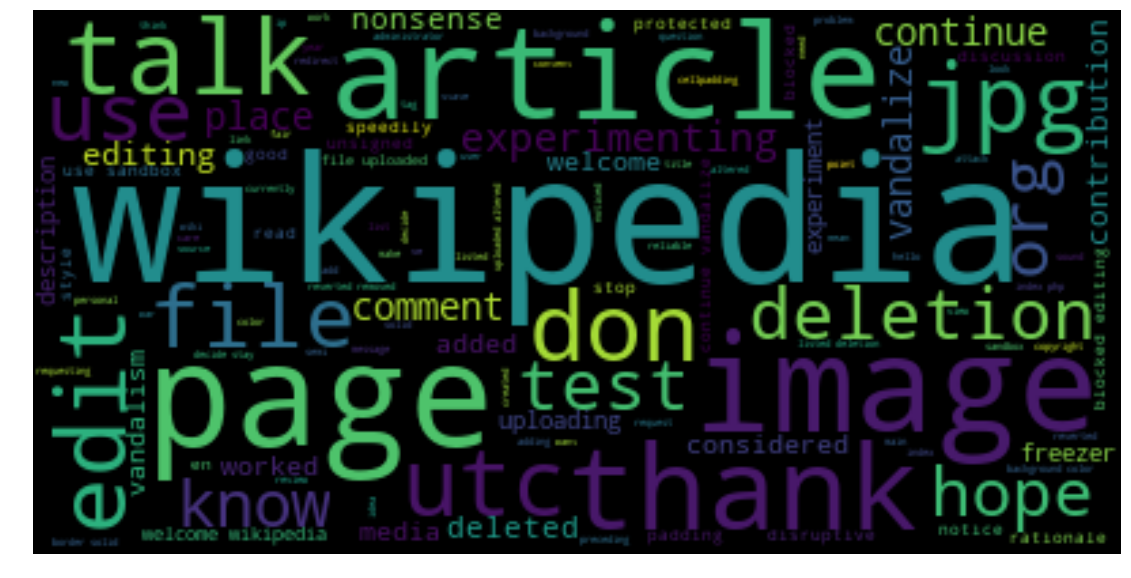

2018-03-01 15:03:46,348 : INFO : using symmetric alpha at 1.0
2018-03-01 15:03:46,349 : INFO : using symmetric eta at 1.0
2018-03-01 15:03:46,413 : INFO : using serial LDA version on this node
2018-03-01 15:03:46,446 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 15294 documents, updating model once every 2000 documents, evaluating perplexity every 15294 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:03:46,472 : INFO : PROGRESS: pass 0, at document #2000/15294
2018-03-01 15:03:46,756 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:03:46,785 : INFO : topic #0 (1.000): 0.003*"nigger" + 0.002*"fuck fuck" + 0.001*"piece" + 0.001*"die" + 0.001*"cock" + 0.001*"fucker" + 0.001*"fuck fuck fuck" + 0.001*"fuckin" + 0.001*"fat" + 0.001*"mother"
2018-03-01 15:03:46,787 : INFO : topic diff=1.080083, rho=1.000000
2018-03-01 15:03:46,815 : INFO : PROGRESS: pass 0, at documen

2018-03-01 15:03:56,737 : INFO : topic diff=0.354185, rho=0.306469
2018-03-01 15:03:56,765 : INFO : PROGRESS: pass 2, at document #4000/15294
2018-03-01 15:03:57,012 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:03:57,040 : INFO : topic #0 (1.000): 0.001*"nigger" + 0.001*"hate" + 0.001*"fuck fuck" + 0.001*"fat" + 0.001*"piece" + 0.001*"die" + 0.001*"cock" + 0.001*"shut" + 0.001*"edits" + 0.001*"im"
2018-03-01 15:03:57,044 : INFO : topic diff=0.340351, rho=0.306469
2018-03-01 15:03:57,069 : INFO : PROGRESS: pass 2, at document #6000/15294
2018-03-01 15:03:57,319 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:03:57,350 : INFO : topic #0 (1.000): 0.001*"fuck fuck" + 0.001*"nigger" + 0.001*"cock" + 0.001*"piece" + 0.001*"hate" + 0.001*"fag" + 0.001*"fat" + 0.001*"oh" + 0.001*"shut" + 0.001*"die"
2018-03-01 15:03:57,352 : INFO : topic diff=0.337984, rho=0.306469
2018-03-01 15:03:57,383 : INFO : PROGRESS

2018-03-01 15:04:07,366 : INFO : topic diff=0.310856, rho=0.281194
2018-03-01 15:04:07,394 : INFO : PROGRESS: pass 4, at document #8000/15294
2018-03-01 15:04:07,755 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:04:07,787 : INFO : topic #0 (1.000): 0.001*"cock" + 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"edits" + 0.001*"fat" + 0.001*"shut" + 0.001*"hate" + 0.001*"wiki" + 0.001*"oh" + 0.001*"piece"
2018-03-01 15:04:07,789 : INFO : topic diff=0.320437, rho=0.281194
2018-03-01 15:04:07,820 : INFO : PROGRESS: pass 4, at document #10000/15294
2018-03-01 15:04:08,105 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:04:08,138 : INFO : topic #0 (1.000): 0.001*"hate" + 0.001*"edits" + 0.001*"wiki" + 0.001*"hi" + 0.001*"oh" + 0.001*"moron" + 0.001*"man" + 0.001*"fuck fuck" + 0.001*"delete" + 0.001*"good"
2018-03-01 15:04:08,141 : INFO : topic diff=0.325441, rho=0.281194
2018-03-01 15:04:08,172 : INFO : PROGR

2018-03-01 15:04:15,379 : INFO : topic diff=0.303760, rho=0.261292
2018-03-01 15:04:15,408 : INFO : PROGRESS: pass 6, at document #12000/15294
2018-03-01 15:04:15,693 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:04:15,722 : INFO : topic #0 (1.000): 0.001*"hate" + 0.001*"wiki" + 0.001*"good" + 0.001*"edits" + 0.001*"ve" + 0.001*"oh" + 0.001*"man" + 0.001*"vandalism" + 0.001*"talk page" + 0.001*"hi"
2018-03-01 15:04:15,724 : INFO : topic diff=0.343914, rho=0.261292
2018-03-01 15:04:15,757 : INFO : PROGRESS: pass 6, at document #14000/15294
2018-03-01 15:04:16,058 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:04:16,091 : INFO : topic #0 (1.000): 0.001*"hate" + 0.001*"wiki" + 0.001*"edits" + 0.001*"ve" + 0.001*"talk page" + 0.001*"good" + 0.001*"vandalism" + 0.001*"man" + 0.001*"oh" + 0.001*"delete"
2018-03-01 15:04:16,093 : INFO : topic diff=0.339417, rho=0.261292
2018-03-01 15:04:16,882 : INFO : -1

2018-03-01 15:04:23,835 : INFO : topic diff=0.319333, rho=0.245094
2018-03-01 15:04:24,573 : INFO : -12.273 per-word bound, 4948.3 perplexity estimate based on a held-out corpus of 1294 documents with 31685 words
2018-03-01 15:04:24,574 : INFO : PROGRESS: pass 8, at document #15294/15294
2018-03-01 15:04:24,776 : INFO : merging changes from 1294 documents into a model of 15294 documents
2018-03-01 15:04:24,806 : INFO : topic #0 (1.000): 0.001*"hate" + 0.001*"talk page" + 0.001*"wiki" + 0.001*"ve" + 0.001*"vandalism" + 0.001*"edits" + 0.001*"oh" + 0.001*"good" + 0.001*"delete" + 0.001*"im"
2018-03-01 15:04:24,808 : INFO : topic diff=0.283647, rho=0.245094
2018-03-01 15:04:24,839 : INFO : PROGRESS: pass 9, at document #2000/15294
2018-03-01 15:04:25,139 : INFO : merging changes from 2000 documents into a model of 15294 documents
2018-03-01 15:04:25,169 : INFO : topic #0 (1.000): 0.001*"nigger" + 0.001*"hate" + 0.001*"fuck fuck" + 0.001*"die" + 0.001*"talk page" + 0.001*"piece" + 0.001*"i

Category: toxic


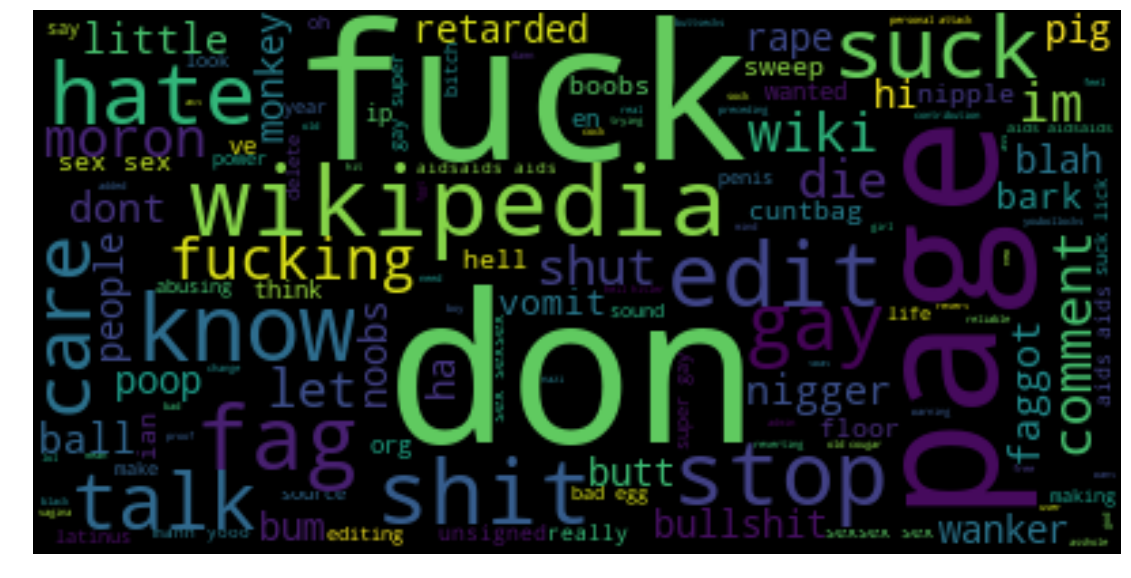

2018-03-01 15:04:30,352 : INFO : using symmetric alpha at 1.0
2018-03-01 15:04:30,354 : INFO : using symmetric eta at 1.0
2018-03-01 15:04:30,364 : INFO : using serial LDA version on this node
2018-03-01 15:04:30,370 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 1595 documents, updating model once every 1595 documents, evaluating perplexity every 1595 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:04:31,181 : INFO : -10.383 per-word bound, 1334.9 perplexity estimate based on a held-out corpus of 1595 documents with 33625 words
2018-03-01 15:04:31,182 : INFO : PROGRESS: pass 0, at document #1595/1595
2018-03-01 15:04:31,419 : INFO : topic #0 (1.000): 0.003*"fuck fuck fuck" + 0.001*"sucks" + 0.001*"penis" + 0.001*"suck suck" + 0.001*"hate" + 0.001*"suck suck suck" + 0.001*"shut fuck" + 0.001*"eat" + 0.001*"idiot" + 0.001*"cocksucker"
2018-03-01 15:04:31,422 : INFO : topic diff=0.276348, rho=1.000000
201

Category: severe_toxic


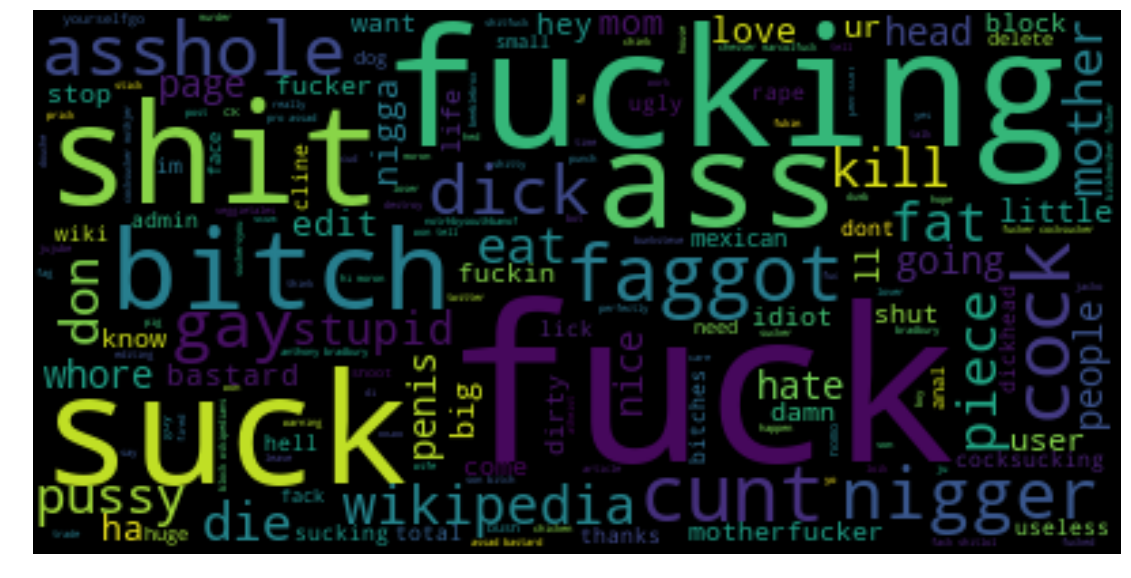

2018-03-01 15:04:43,751 : INFO : using symmetric alpha at 1.0
2018-03-01 15:04:43,753 : INFO : using symmetric eta at 1.0
2018-03-01 15:04:43,784 : INFO : using serial LDA version on this node
2018-03-01 15:04:43,803 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 8449 documents, updating model once every 2000 documents, evaluating perplexity every 8449 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:04:43,827 : INFO : PROGRESS: pass 0, at document #2000/8449
2018-03-01 15:04:44,100 : INFO : merging changes from 2000 documents into a model of 8449 documents
2018-03-01 15:04:44,116 : INFO : topic #0 (1.000): 0.003*"nigger" + 0.002*"fuck fuck" + 0.001*"die" + 0.001*"fucker" + 0.001*"fuck fuck fuck" + 0.001*"fuckin" + 0.001*"fat" + 0.001*"mother" + 0.001*"piece shit" + 0.001*"kill"
2018-03-01 15:04:44,119 : INFO : topic diff=1.045456, rho=1.000000
2018-03-01 15:04:44,146 : INFO : PROGRESS: pass 0, at docume

2018-03-01 15:04:49,969 : INFO : PROGRESS: pass 3, at document #4000/8449
2018-03-01 15:04:50,331 : INFO : merging changes from 2000 documents into a model of 8449 documents
2018-03-01 15:04:50,357 : INFO : topic #0 (1.000): 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"fat" + 0.001*"shut" + 0.001*"blocked" + 0.001*"right" + 0.001*"good" + 0.001*"big" + 0.001*"damn" + 0.001*"bullshit"
2018-03-01 15:04:50,359 : INFO : topic diff=0.401379, rho=0.348695
2018-03-01 15:04:50,395 : INFO : PROGRESS: pass 3, at document #6000/8449
2018-03-01 15:04:50,713 : INFO : merging changes from 2000 documents into a model of 8449 documents
2018-03-01 15:04:50,728 : INFO : topic #0 (1.000): 0.001*"fuck fuck" + 0.001*"nigger" + 0.001*"bastard" + 0.001*"fag" + 0.001*"fat" + 0.001*"right" + 0.001*"blocked" + 0.001*"fuck fuck fuck" + 0.001*"oh" + 0.001*"make"
2018-03-01 15:04:50,731 : INFO : topic diff=0.406189, rho=0.348695
2018-03-01 15:04:50,762 : INFO : PROGRESS: pass 3, at document #8000/8449
2018-03-01 15

2018-03-01 15:04:56,772 : INFO : merging changes from 2000 documents into a model of 8449 documents
2018-03-01 15:04:56,792 : INFO : topic #0 (1.000): 0.001*"fuck fuck" + 0.001*"bullshit" + 0.001*"blocked" + 0.001*"oh" + 0.001*"nigger" + 0.001*"big" + 0.001*"damn" + 0.001*"right" + 0.001*"make" + 0.001*"penis"
2018-03-01 15:04:56,794 : INFO : topic diff=0.353446, rho=0.298481
2018-03-01 15:04:57,061 : INFO : -11.277 per-word bound, 2482.3 perplexity estimate based on a held-out corpus of 449 documents with 11801 words
2018-03-01 15:04:57,063 : INFO : PROGRESS: pass 6, at document #8449/8449
2018-03-01 15:04:57,123 : INFO : merging changes from 449 documents into a model of 8449 documents
2018-03-01 15:04:57,141 : INFO : topic #0 (1.000): 0.001*"bullshit" + 0.001*"yeah" + 0.001*"blocked" + 0.001*"damn" + 0.001*"ve" + 0.001*"good" + 0.001*"said" + 0.001*"oh" + 0.001*"crap" + 0.001*"fuck fuck"
2018-03-01 15:04:57,144 : INFO : topic diff=0.306232, rho=0.298481
2018-03-01 15:04:57,170 : INF

2018-03-01 15:05:02,788 : INFO : topic #0 (1.000): 0.001*"bullshit" + 0.001*"yeah" + 0.001*"blocked" + 0.001*"damn" + 0.001*"ve" + 0.001*"good" + 0.001*"said" + 0.001*"fuck fuck" + 0.001*"oh" + 0.001*"crap" + 0.001*"big" + 0.001*"right" + 0.001*"man" + 0.001*"vandalism" + 0.001*"im" + 0.001*"editing" + 0.001*"talk page" + 0.001*"got" + 0.000*"edits" + 0.000*"make" + 0.000*"personal" + 0.000*"way" + 0.000*"read" + 0.000*"use" + 0.000*"ip" + 0.000*"sorry" + 0.000*"come" + 0.000*"tell" + 0.000*"better" + 0.000*"nigger" + 0.000*"does" + 0.000*"penis" + 0.000*"look" + 0.000*"wiki" + 0.000*"sucks" + 0.000*"pages" + 0.000*"thanks" + 0.000*"wrong" + 0.000*"delete" + 0.000*"shut" + 0.000*"ur" + 0.000*"hate" + 0.000*"let" + 0.000*"bastard" + 0.000*"need" + 0.000*"fuck fuck fuck" + 0.000*"actually" + 0.000*"fag" + 0.000*"hi" + 0.000*"god" + 0.000*"fat" + 0.000*"message" + 0.000*"pussy" + 0.000*"thank" + 0.000*"work" + 0.000*"leave" + 0.000*"piece shit" + 0.000*"care" + 0.000*"balls" + 0.000*"real

Category: obscene


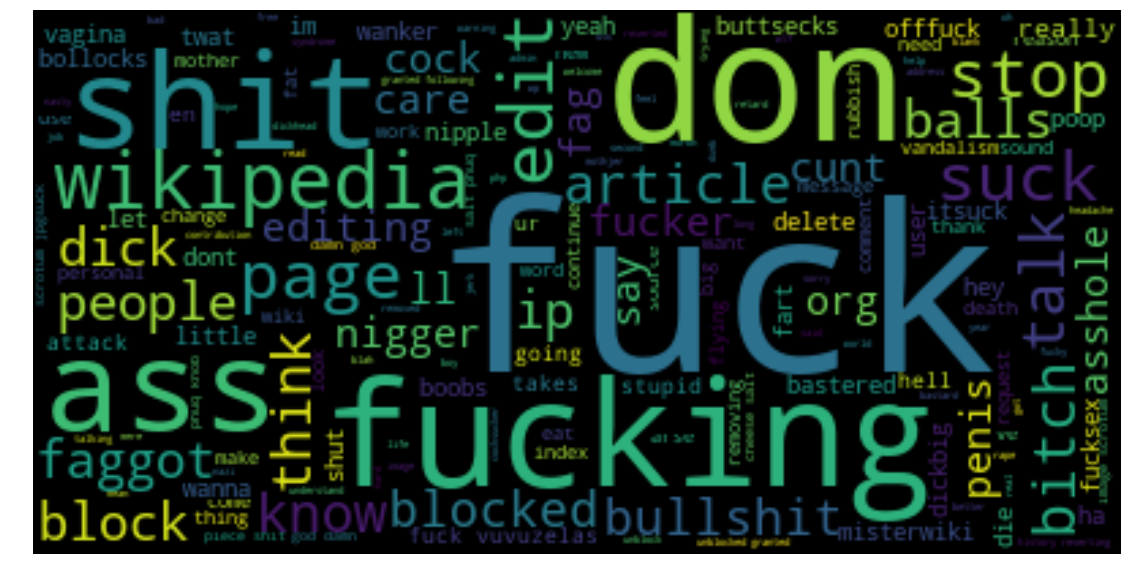

2018-03-01 15:05:04,462 : INFO : using symmetric alpha at 1.0
2018-03-01 15:05:04,465 : INFO : using symmetric eta at 1.0
2018-03-01 15:05:04,469 : INFO : using serial LDA version on this node
2018-03-01 15:05:04,477 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 478 documents, updating model once every 478 documents, evaluating perplexity every 478 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:05:04,694 : INFO : -9.418 per-word bound, 684.0 perplexity estimate based on a held-out corpus of 478 documents with 10668 words
2018-03-01 15:05:04,695 : INFO : PROGRESS: pass 0, at document #478/478
2018-03-01 15:05:04,757 : INFO : topic #0 (1.000): 0.001*"ya" + 0.001*"murder" + 0.001*"destroy" + 0.001*"fat" + 0.001*"edit" + 0.001*"delete" + 0.001*"kill kill" + 0.001*"dare" + 0.001*"suck" + 0.001*"big"
2018-03-01 15:05:04,758 : INFO : topic diff=0.307310, rho=1.000000
2018-03-01 15:05:04,951 : INFO : -9.299 p

Category: threat


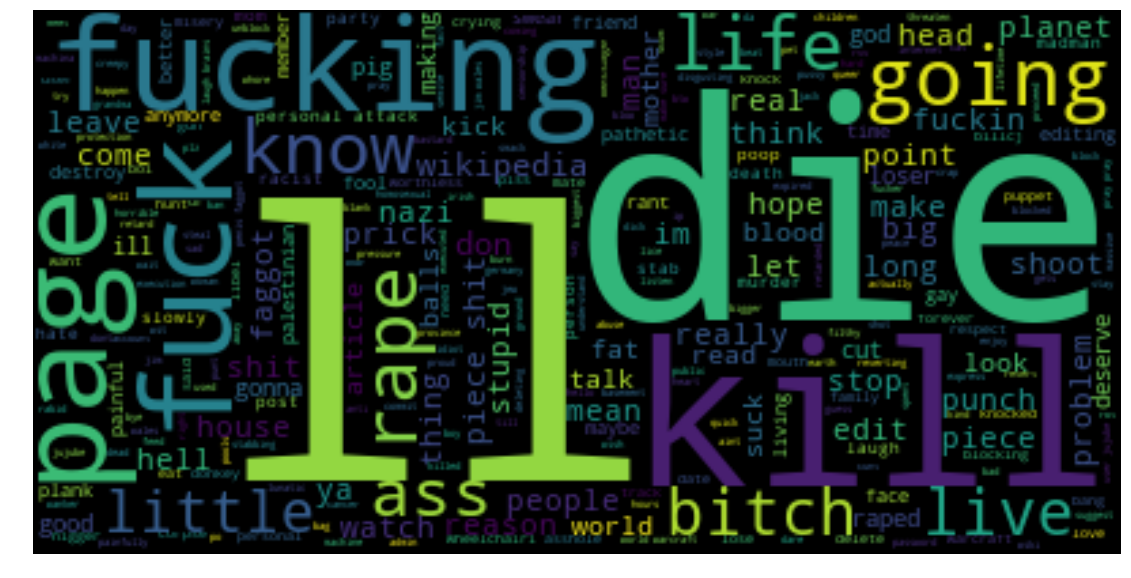

2018-03-01 15:05:10,515 : INFO : using symmetric alpha at 1.0
2018-03-01 15:05:10,519 : INFO : using symmetric eta at 1.0
2018-03-01 15:05:10,569 : INFO : using serial LDA version on this node
2018-03-01 15:05:10,591 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 7877 documents, updating model once every 2000 documents, evaluating perplexity every 7877 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:05:10,619 : INFO : PROGRESS: pass 0, at document #2000/7877
2018-03-01 15:05:10,880 : INFO : merging changes from 2000 documents into a model of 7877 documents
2018-03-01 15:05:10,896 : INFO : topic #0 (1.000): 0.003*"nigger" + 0.002*"fuck fuck" + 0.001*"die" + 0.001*"fuck fuck fuck" + 0.001*"fucker" + 0.001*"fuckin" + 0.001*"fat" + 0.001*"mother" + 0.001*"piece shit" + 0.001*"kill"
2018-03-01 15:05:10,899 : INFO : topic diff=1.028224, rho=1.000000
2018-03-01 15:05:10,926 : INFO : PROGRESS: pass 0, at docume

2018-03-01 15:05:18,963 : INFO : PROGRESS: pass 4, at document #2000/7877
2018-03-01 15:05:19,231 : INFO : merging changes from 2000 documents into a model of 7877 documents
2018-03-01 15:05:19,252 : INFO : topic #0 (1.000): 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"fat" + 0.001*"hate" + 0.001*"die" + 0.001*"moron" + 0.001*"shut" + 0.001*"mother" + 0.001*"fucker" + 0.001*"fag"
2018-03-01 15:05:19,256 : INFO : topic diff=0.379692, rho=0.334478
2018-03-01 15:05:19,280 : INFO : PROGRESS: pass 4, at document #4000/7877
2018-03-01 15:05:19,496 : INFO : merging changes from 2000 documents into a model of 7877 documents
2018-03-01 15:05:19,509 : INFO : topic #0 (1.000): 0.001*"fat" + 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"hate" + 0.001*"ll" + 0.001*"ur" + 0.001*"shut" + 0.001*"die" + 0.001*"moron" + 0.001*"mother"
2018-03-01 15:05:19,510 : INFO : topic diff=0.368381, rho=0.334478
2018-03-01 15:05:19,532 : INFO : PROGRESS: pass 4, at document #6000/7877
2018-03-01 15:05:19,728 : INFO : 

2018-03-01 15:05:28,117 : INFO : merging changes from 2000 documents into a model of 7877 documents
2018-03-01 15:05:28,138 : INFO : topic #0 (1.000): 0.001*"fat" + 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"hate" + 0.001*"moron" + 0.001*"shut" + 0.001*"ll" + 0.001*"ur" + 0.001*"die" + 0.001*"fag"
2018-03-01 15:05:28,141 : INFO : topic diff=0.298287, rho=0.278008
2018-03-01 15:05:28,172 : INFO : PROGRESS: pass 8, at document #6000/7877
2018-03-01 15:05:28,394 : INFO : merging changes from 2000 documents into a model of 7877 documents
2018-03-01 15:05:28,412 : INFO : topic #0 (1.000): 0.001*"fat" + 0.001*"nigger" + 0.001*"fuck fuck" + 0.001*"fag" + 0.001*"moron" + 0.001*"going" + 0.001*"hate" + 0.001*"shut" + 0.001*"delete" + 0.001*"ll"
2018-03-01 15:05:28,415 : INFO : topic diff=0.294980, rho=0.278008
2018-03-01 15:05:29,295 : INFO : -11.691 per-word bound, 3307.0 perplexity estimate based on a held-out corpus of 1877 documents with 44083 words
2018-03-01 15:05:29,296 : INFO : PROGRES

Category: insult


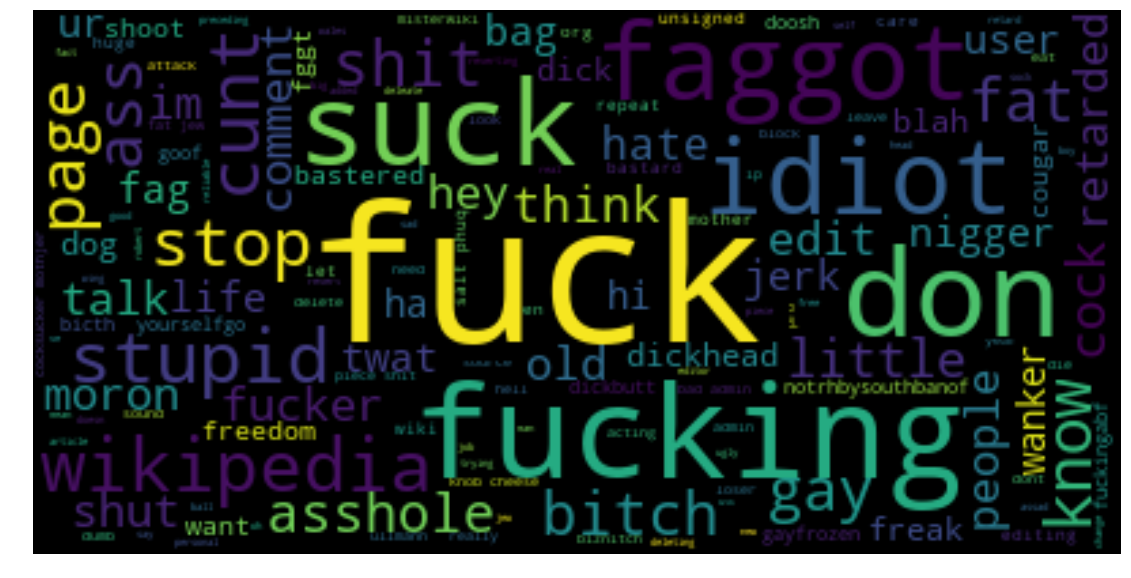

2018-03-01 15:05:32,699 : INFO : using symmetric alpha at 1.0
2018-03-01 15:05:32,701 : INFO : using symmetric eta at 1.0
2018-03-01 15:05:32,710 : INFO : using serial LDA version on this node
2018-03-01 15:05:32,716 : INFO : running online (multi-pass) LDA training, 1 topics, 10 passes over the supplied corpus of 1405 documents, updating model once every 1405 documents, evaluating perplexity every 1405 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-01 15:05:33,253 : INFO : -10.476 per-word bound, 1423.8 perplexity estimate based on a held-out corpus of 1405 documents with 33004 words
2018-03-01 15:05:33,254 : INFO : PROGRESS: pass 0, at document #1405/1405
2018-03-01 15:05:33,464 : INFO : topic #0 (1.000): 0.002*"nigger nigger" + 0.002*"nigger nigger nigger" + 0.001*"ur" + 0.001*"white" + 0.001*"fucker" + 0.001*"die" + 0.001*"gay gay" + 0.001*"fat jew" + 0.001*"man" + 0.001*"jew fat"
2018-03-01 15:05:33,465 : INFO : topic diff=0.282362, rho=1.000000
2018-03-

Category: identity_hate


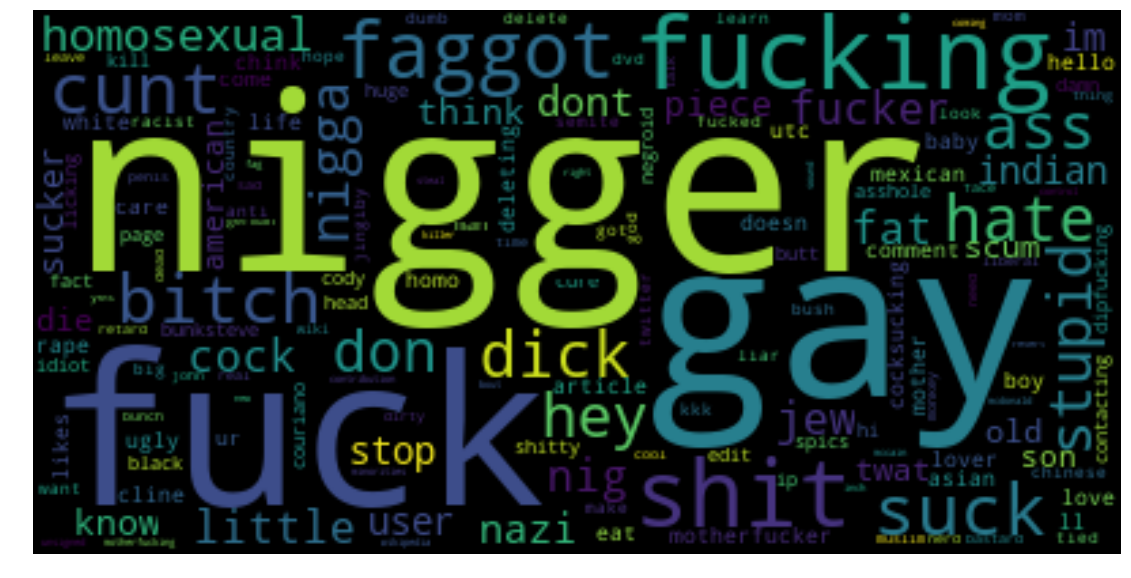

In [15]:
# https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda
categories = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']

for category in categories:
    if category == 'clean':
        doc = df_nt
    else:
        doc = df_t[df_t[category]==1]
    count_vectorizer = CountVectorizer(ngram_range=(1, 3),  stop_words='english',max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
    count_vectorizer.fit(doc.comment_text_s)
    counts = count_vectorizer.transform(doc.comment_text_s).transpose()
    corpus = matutils.Sparse2Corpus(counts)
    id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
    
    lda = models.LdaModel(corpus=corpus, num_topics=1, id2word=id2word, passes=10) # minimum_probability=0.03, 
    topics = lda.print_topics(num_words=2000)

    print("Category: " + category)
    for topic in topics:
        wordcloud = WordCloud(max_words=2000).generate(topic[1])
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud,interpolation='bilinear')
        plt.savefig('../charts/wordcloud' + category + '_1.png')
        plt.axis("off")
        plt.show()

In [ ]:
# #clean comments
# # clean_mask=np.array(Image.open("../input/imagesforkernal/safe-zone.png"))
# clean_mask=clean_mask[:,:,1]
# #wordcloud for clean comments
# # subset=train[train.clean==True]
# # text=subset.comment_text.values
# wc= WordCloud(background_color="black",max_words=2000,mask=clean_mask,stopwords=stopword)
# wc.generate(" ".join(text))
# plt.figure(figsize=(20,10))
# plt.axis("off")
# plt.title("Words frequented in Clean Comments", fontsize=20)
# plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
# plt.show()

In [ ]:
# # toxic_mask=np.array(Image.open("../input/imagesforkernal/toxic-sign.png"))
# toxic_mask=toxic_mask[:,:,1]
# #wordcloud for clean comments
# subset=train[train.toxic==1]
# text=subset.comment_text.values
# wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword)
# wc.generate(" ".join(text))
# plt.figure(figsize=(20,20))
# plt.subplot(221)
# plt.axis("off")
# plt.title("Words frequented in Toxic Comments", fontsize=20)
# plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

# #Severely toxic comments
# plt.subplot(222)
# # severe_toxic_mask=np.array(Image.open("../input/imagesforkernal/bomb.png"))
# severe_toxic_mask=severe_toxic_mask[:,:,1]
# subset=train[train.severe_toxic==1]
# text=subset.comment_text.values
# wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
# wc.generate(" ".join(text))
# plt.axis("off")
# plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
# plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

# #Threat comments
# plt.subplot(223)
# # threat_mask=np.array(Image.open("../input/imagesforkernal/anger.png"))
# threat_mask=threat_mask[:,:,1]
# subset=train[train.threat==1]
# text=subset.comment_text.values
# wc= WordCloud(background_color="black",max_words=2000,mask=threat_mask,stopwords=stopword)
# wc.generate(" ".join(text))
# plt.axis("off")
# plt.title("Words frequented in Threatening Comments", fontsize=20)
# plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

# #insult
# plt.subplot(224)
# # insult_mask=np.array(Image.open("../input/imagesforkernal/swords.png"))
# insult_mask=insult_mask[:,:,1]
# subset=train[train.insult==1]
# text=subset.comment_text.values
# wc= WordCloud(background_color="black",max_words=2000,mask=insult_mask,stopwords=stopword)
# wc.generate(" ".join(text))
# plt.axis("off")
# plt.title("Words frequented in insult Comments", fontsize=20)
# plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

# plt.show()